In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit
import emcee

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata06 = pd.read_csv("perlist06.csv")
    f = perdata06['f']
    per = perdata06['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata06)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
bnds=(0.001,0.1),(1.0E-4,1.0E-3),(2.0,5.0),(0,1)
minimizer_kwargs = {"bounds":(bnds)}
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = minimize(twi_minus_loglikelihood,x0_array,method = 'TNC',bounds=bnds)


# 规定边界值的情况下，三种方法可以使用：L-BFGS-B，TNC，SLSQP。  其中 L-BFGS-B 和 TNC 拟合结果较好，SLSQP 整体结果靠上，TNC 时间较长

# m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

210.9331731774007
210.9331731774007
210.9332282200266
210.93705069972455
210.93317290582866
210.93319513997434
210.93311515289997
210.93311515289997
210.93317019550838
210.93699267416238
210.93311488132792
210.933137115473
210.93304474096587
210.93304474096587
210.93309978363837
210.93692226635156
210.93304446939345
210.9330667035397
-256.4986325211891
-256.4986325211891
-256.4985509020023
-256.4919209440258
-256.49863294621935
-256.49860521755227
3984798.14702043
3984798.14702043
3984795.0477637113
3984192.978318767
3984798.296875877
3983164.752524076
-1637.2804826574009
-1637.2804826574009
-1637.2803874878593
-1637.2687496120018
-1637.2804834499364
-1637.2804421274975
-1823.4527791760825
-1823.4527791760825
-1823.452686950707
-1823.4410311622164
-1823.4527799401933
-1823.452753611299
-1835.4355181470144
-1835.4355181470144
-1835.4354354973514
-1835.4250859742535
-1835.4355187028425
-1835.4355497175768
-1859.8053216992466
-1859.8053216992466
-1859.8052328018944
-1859.7939573941749
-18

-1906.3534986221498
-1906.3552899591493
-1906.3533494736232
-1906.353348826335
-1911.7474708622653
-1911.7474708622653
-1911.7475075372095
-1911.7481042113627
-1911.747470814015
-1911.7474701832934
-1912.4622061032483
-1912.4622061032483
-1912.462219174062
-1912.4624675791147
-1912.462206064448
-1912.4622055953569
-1912.5853303794897
-1912.5853303794897
-1912.5853358756735
-1912.5854672361913
-1912.5853303422182
-1912.5853299837925
-1912.6057215212131
-1912.6057215212131
-1912.605724025103
-1912.6058108757804
-1912.6057214839038
-1912.6057211876514
-1912.60721790371
-1912.60721790371
-1912.6072190852888
-1912.607287172576
-1912.6072178661852
-1912.6072176026712
-1912.6072179038829
-1912.6072179038829
-1912.607219085468
-1912.6072871727495
-1912.6072178663594
-1912.607217602849
-1912.6072179040543
-1912.6072179040543
-1912.6072190856357
-1912.6072871729123
-1912.607217866533
-1912.6072176030182
-1912.6072311203616
-1912.6072311203616
-1912.607232300083
-1912.6073002490148
-1912.60723108

In [4]:
print(m)

# L-BFGS-B  -1906.6084082908274
# TNC       -1912.6138287210717
# SLSQP     -66.38624299279365

     fun: -1912.6138287210717
     jac: array([1.37015149e+01, 3.33305522e+03, 3.06042693e+00, 1.49444531e+01])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 17
  status: 3
 success: False
       x: array([4.24958141e-03, 1.95315132e-04, 3.88580272e+00, 1.20527107e-01])


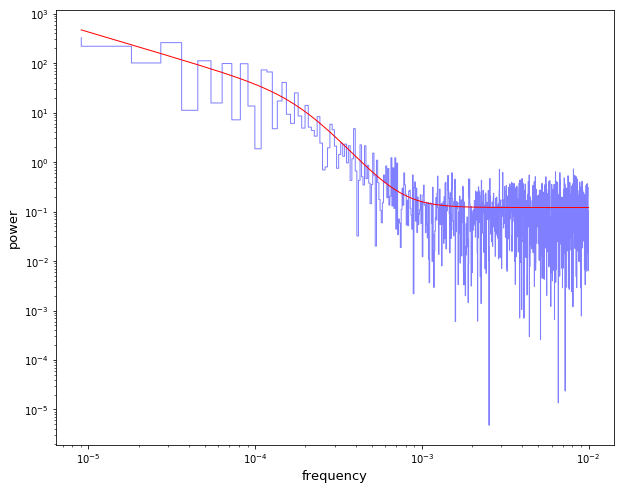

In [5]:
perdata06 = pd.read_csv("perlist06.csv")
f = perdata06['f']
per = perdata06['per']

alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [6]:
# 均匀先验

def lnprior(theta):
    A,f_b,alpha_H,poisson = theta
    alpha_L = 1.0
    if 0.001 < A < 0.1 and 1.0E-4 < f_b < 1.0E-3 and 2.0 < alpha_H < 5.0 and 0.0 < poisson < 1.0:
        return 0.0
    return -np.inf

# 后验概率？

def lnprob(theta):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp - 0.5* twi_minus_loglikelihood(theta))

In [24]:
# emcee

ndim, nwalkers = 4, 100
pos = [m["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
sampler.run_mcmc(pos, 500)

-1889.6180698068874
-1903.1568017436823
-1790.5097981844249
-1785.3424158231096
-1909.5351680761785
-1885.6224454342148
-1910.4845340266736
-1907.9992698345848
-1912.217412400116
-1881.3466632097304
-1792.043667981088
-1912.4178136852051
-1892.1265697669671
-1889.6624711684908
-1864.5863566805579
-1794.983189054632
-1908.9182354207292
-1903.8846753726348
-1775.3249755383883
-1891.9169445379428
-1863.7327299316207
-1907.5655730956382
-1857.2597719381397
-1912.1998593403773
-1903.055523332042
-1762.240747066823
-1807.491413775276
-1839.7027679362552
-1807.5472833422812
-1885.0147209539732
-1909.5710356584395
-1821.6637814258406
-1906.9580194704683
-1907.0162241242983
-1911.6411906348403
-1875.445923892235
-1901.4404557967225
-1905.6021470166352
-1828.8673925941823
-1793.2345832501894
-1869.0166401837525
-1869.144406214287
-1776.9094173804924
-1887.492034743818
-1769.5522705039127
-1906.8199704812976
-1881.5848068098828
-1912.190567253853
-1901.3950316476096
-1837.9573033729848
-1866.7665

F:\Anaconda\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
F:\Anaconda\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


-1846.9233216757348
-1788.7011907750682
-1871.086605744285
-1797.049232406489
-1889.6430513478217
-1910.232633175788
-1909.4896573519352
-1894.6828840961398
-1912.152295777313
-1833.2928510816203
-1740.5403790964162
-1864.2112084247563
-1800.1922923370848
-1724.898003551725
-1899.03872113089
-1896.8609682187873
-1852.450684181172
-1700.4213897118207
-1898.8000434016062
-1880.4458341606153
-1890.5623683884983
-1751.464828869983
-1887.0495868398118
-1883.8585839372877
-1885.3430041938311
-1807.658157888536
-1890.3085029847011
-1892.9590217335974
-1615.7885196567465
-1899.5781733431493
-1910.7593661613942
-1901.1625841701978
-1816.9332181714296
-1912.6128459248612
-1912.064089077157
-1905.6100441026736
-1862.3349601612333
-1912.284368852443
-1797.886956707526
-1910.5315499407548
-1887.901587230777
-1902.574211510572
-1912.36667962139
-1888.2949016218172
-1849.7301984941084
-1889.915908702532
-1880.319882479915
-1884.657028437446
-1891.7839051434482
-1912.2926981099113
-1816.714928451242
-

-1912.483986285391
-1889.6565420279574
-1862.38486115159
-1912.178786646764
-1847.9298011321025
-1906.9617376517613
-1887.893869654757
-1905.8481392348037
-1906.1271626194746
-1766.2382074858394
-1910.3163049783795
-1912.2560621990272
-1906.7068338908873
-1908.5745530755398
-1766.9096964665969
-1859.9964253616963
-1903.5295503028456
-1911.7653216763233
-1912.0836633094577
-1912.4369849048917
-1911.7449049777858
-1903.1214558355848
-1912.2257056304952
-1900.089600661219
-1902.3141676859248
-1872.15389361547
-1906.8835838574553
-1912.4998778011984
-1900.4957969151906
-1861.4027260712458
-1863.5281071669542
-1902.4841936891214
-1911.7911678615421
-1889.5797018338
-1876.4075434436595
-1900.0197836452628
-1912.3163797735904
-1912.1300309643532
-1829.8194364168173
-1912.600135686632
-1910.8330309533976
-1896.6202350738065
-1910.867478135564
-1912.1432911194374
-1912.3247011576552
-1911.5424830421457
-1904.7190079638387
-1802.5336909639257
-1906.2543875503209
-1870.6929321552664
-1911.3422209

-1882.003064619596
-1911.90277976423
-1911.4762465194794
-1912.3120847786613
-1911.6674945049842
-1907.0257244258758
-1911.4138489258937
-1897.2340090106356
-1911.1332790799904
-1900.450368035139
-1906.5132183194964
-1882.5065738686023
-1912.5393994833266
-1859.4949852531802
-1908.509653981919
-1909.4632301257723
-1906.2503626888706
-1873.844965249651
-1891.4336599957169
-1912.080668204782
-1908.9396541717447
-1851.3047672961989
-1910.1963138121323
-1912.3234343998977
-1904.136726930929
-1910.9588431433792
-1912.3891736242908
-1908.2084162332176
-1902.3108315270435
-1912.2528662818074
-1912.5762137822232
-1911.596708436105
-1912.0264435461927
-1907.8127155762775
-1880.4360542536913
-1912.533094002966
-1904.4368766402756
-1911.8959825416073
-1911.427309972973
-1911.943899229458
-1897.1806386826452
-1910.92141301304
-1912.1965889804067
-1905.9394879339025
-1783.5551237878212
-1862.2863104357582
-1912.4860651050012
-1899.2724965548446
-1912.0701696732647
-1905.356799457441
-1905.201094580

-1912.5549768714286
-1907.3380180462816
-1902.5763082452029
-1881.6066117793032
-1850.3447596850644
-1911.3168009397418
-1899.2844674777039
-1912.3803739847228
-1902.7469903889112
-1910.169625712576
-1909.4033922412411
-1906.0090979499132
-1911.481232451505
-1912.1561142729008
-1901.5311495533824
-1911.6219513323847
-1909.3831615406527
-1911.1785059423378
-1868.062359844042
-1907.0170118309436
-1907.8677759305933
-1910.3221672579768
-1904.8022881083864
-1912.476802378376
-1807.091764324602
-1912.5514480347126
-1909.2504395582855
-1903.005701873803
-1909.820983914465
-1912.1458727147183
-1910.4626865160649
-1820.6784661356405
-1873.7751751803244
-1909.8957047704232
-1912.0052221431056
-1912.013819844692
-1907.1381432572762
-1907.079637278733
-1904.7097242834504
-1907.3490172511488
-1911.5404610821352
-1906.0902036882499
-1911.9480209179915
-1911.478986326579
-1912.1795334754952
-1908.5168142427915
-1910.128929198561
-1908.3892624795462
-1911.8698761182845
-1893.7956864739936
-1911.78416

-1910.4388868338638
-1903.7631343195385
-1912.3358544971097
-1912.5355212722168
-1901.4457783580901
-1898.9277973227233
-1911.3007111266168
-1909.467315720926
-1908.9564866291164
-1907.6186624257643
-1891.0307032907094
-1911.0207476068226
-1897.518452225235
-1911.523193379686
-1910.0389512497572
-1912.2232519282004
-1911.1589394377775
-1908.678997465116
-1912.5693700967486
-1912.2138926284447
-1908.5723598632646
-1912.3224883885364
-1910.9766219519715
-1901.0331461808255
-1912.404768957807
-1910.4690072904248
-1906.8053592975343
-1900.7166150102112
-1911.7275624517135
-1912.4586352436936
-1912.5948130396744
-1894.1734442002412
-1911.5543525089313
-1904.2281848693085
-1910.9668858445348
-1908.6290903420804
-1911.4799504484404
-1908.584915821592
-1908.8263238729135
-1911.4667504180636
-1823.815288579062
-1911.5732484430578
-1861.6282332716191
-1887.088155393759
-1908.1536404512217
-1909.1496914299546
-1910.5322467677531
-1912.2038468306523
-1910.0121400210796
-1910.859313003279
-1899.537

-1910.493050822227
-1912.2377290781217
-1906.1120916091634
-1911.7234780013666
-1912.390028537907
-1893.9308254469372
-1900.5192217328515
-1904.8150817958015
-1910.3384271676316
-1912.4359329775953
-1898.7322865800058
-1908.6680475214566
-1911.1304431009878
-1901.9379523757282
-1906.2995557312966
-1910.548104435108
-1901.9199759820965
-1910.9975767583003
-1908.0043181387011
-1908.9761372604673
-1905.259281511895
-1911.2538699951015
-1912.4694696212675
-1912.5852415181268
-1908.2212982679102
-1911.3997533909674
-1912.2376894042754
-1897.951363573742
-1907.3897813363506
-1908.286336022162
-1912.1683163870596
-1891.2588024423546
-1907.6423805939357
-1912.5392854365562
-1911.9287118348393
-1908.3169636163054
-1908.80645135929
-1901.240669031458
-1902.3265930304754
-1910.649045530064
-1776.0677091121918
-1909.484524668083
-1911.6089215108857
-1912.191236321188
-1910.3723501310367
-1910.4883636944637
-1900.305995052358
-1907.620177103123
-1911.3916902656383
-1912.0679790466859
-1908.76696250

-1907.8001134696133
-1911.7569422103782
-1910.6606791979887
-1911.6523864598894
-1911.3363446590258
-1905.6164276110585
-1912.4771342552149
-1902.559046360044
-1858.2733669017994
-1900.0965659463986
-1910.2281242073461
-1909.1823605524262
-1906.8382845417016
-1911.4728462951368
-1912.1275574593315
-1905.4455442655635
-1910.41256132585
-1911.5212642826043
-1910.0720292346166
-1910.577193615314
-1912.4808148024895
-1906.5713052869119
-1910.6135347916284
-1884.0029012470675
-1909.8223615088684
-1911.3626355054864
-1906.568172679049
-1912.3826186650929
-1909.8642458647646
-1906.4231193852195
-1906.337360139829
-1909.307953519675
-1907.1668452389513
-1908.4937615976876
-1912.4613648551172
-1912.5844989861353
-1911.318405905363
-1911.8920884275947
-1912.0372371652197
-1911.399156077915
-1911.5580866399018
-1911.2499227874148
-1910.0380883168605
-1910.747978599506
-1911.9252406333972
-1906.8670994072106
-1911.9772570529508
-1885.6057007890145
-1909.5174564631138
-1884.9156607069187
-1910.8197

-1896.931230115991
-1907.5903446846112
-1908.394959056939
-1894.380589078114
-1771.9388371724017
-1910.8262920156378
-1910.657662489529
-1912.1488083214163
-1907.243315027361
-1907.1288242312994
-1908.3556740900167
-1906.4230279082474
-1881.1829220453167
-1910.4285931098357
-1904.212038780008
-1822.0850895763333
-1912.3428933681782
-1895.8948435261093
-1908.7620185661715
-1909.403708445111
-1911.3032191247255
-1910.4866238089562
-1880.1192153226357
-1897.4785063868487
-1908.7967235453802
-1911.9095306956501
-1743.0484761422647
-1905.2788874017135
-1885.477286713537
-1911.5906974043269
-1908.7706267633203
-1910.103425004871
-1912.1472893282373
-1880.5986653361072
-1910.5872878927162
-1845.9353929169706
-1910.209272290257
-1912.0671711638695
-1911.5659678411316
-1885.9866196408814
-1907.0894645821197
-1910.739384948644
-1911.275196041237
-1910.701949624021
-1912.250322591143
-1911.5870324350826
-1908.3747981351853
-1910.429193458575
-1907.2259851695253
-1911.8139264146894
-1911.431015374

-1910.7639009909176
-1910.6966203637946
-1911.3926529457385
-1911.3187358471012
-1901.138885658135
-1878.5191782117079
-1902.2494575864316
-1905.220626546655
-1889.132480618007
-1902.0884232827982
-1894.1262097289311
-1905.7782592747774
-1904.8997519256181
-1911.171576072939
-1797.7841516652754
-1908.2812095964814
-1909.031042908809
-1895.6329773928585
-1907.4524911607746
-1902.1552585999061
-1911.8366949874826
-1906.9994739422762
-1911.3083373585675
-1910.9267090459734
-1870.7083184245316
-1911.4494324687996
-1908.9250309227173
-1911.4133395605493
-1909.8494511293604
-1901.1619310730832
-1911.4376112812615
-1911.3124159232473
-1912.1063656857775
-1898.428740981018
-1905.9082538686355
-1905.3734924791
-1911.8498130725814
-1901.383351168527
-1906.4850124247987
-1849.6485649961783
-1898.8655871015885
-1912.0484137738435
-1900.476887948528
-1911.90305231295
-1910.7446104812966
-1911.215951707812
-1909.538166402317
-1912.1617425318702
-1909.1142535775668
-1911.5845371609958
-1911.976995935

-1910.432093135046
-1850.715306375341
-1904.616960590821
-1909.503702521981
-1905.203687497087
-1910.2695606215693
-1909.7180818203663
-1891.9357591159767
-1912.3163076132876
-1909.8941695352005
-1910.5878266741395
-1911.7708184982812
-1911.5535117274994
-1899.8512898537451
-1910.9188890690323
-1907.312950493334
-1910.3484113562677
-1904.3107768245422
-1877.0065089732284
-1911.1334789719413
-1910.2952517593787
-1906.2353811164965
-1909.8975298996297
-1907.399518113133
-1907.4607552705493
-1854.7889348456247
-1903.9238561836153
-1911.8529973589493
-1892.6550575511355
-1911.6639781491124
-1909.0736391859275
-1910.963064890462
-1908.6284140377338
-1898.6346480362608
-1906.1257230188326
-1910.7780608246458
-1906.3160676836458
-1912.111261071258
-1911.7517868512002
-1911.0724420048366
-1911.0589536565426
-1907.891400030721
-1910.9235943756507
-1907.3218853313172
-1871.3500868994531
-1898.7969463224904
-1890.9841988133987
-1907.4258800935377
-1892.6145410219851
-1903.5016271003028
-1911.9609

-1912.3298231742222
-1908.0138916249143
-1908.5868669496372
-1895.904232490557
-1870.8338968245027
-1908.3731246051912
-1912.2724303704226
-1888.5036543819394
-1912.538235061295
-1910.3658714997357
-1911.2565117251293
-1909.7346184245441
-1807.624940199045
-1910.311104296316
-1905.517944923613
-1901.62277802674
-1907.1298387454392
-1910.81320273688
-1903.3655705988606
-1908.3526752368339
-1910.4100769359422
-1911.9705990845475
-1910.6702687355114
-1911.8121605394422
-1908.2982088162155
-1902.912787395426
-1905.3286316115514
-1905.9885752435741
-1909.8132717815351
-1893.9055265786703
-1910.6630103545078
-1899.3462264148543
-1909.0275740724035
-1912.233152339748
-1911.3624537595633
-1911.9398200804615
-1910.901342781864
-1911.746925409607
-1912.2403978199284
-1908.413195154728
-1904.5299899352694
-1907.3751018425708
-1908.7059936887408
-1856.493557300424
-1897.9407912467573
-1911.266991963356
-1911.946592157481
-1910.6828763530796
-1906.9062144155341
-1911.4959010008267
-1910.59009578258

-1910.1416100967838
-1905.1013414102117
-1910.2726820703915
-1911.3413089633457
-1909.5513006798415
-1911.343383699531
-1817.4649902777132
-1883.9354421109904
-1906.7899417237272
-1911.635076864739
-1906.3057377939497
-1908.9175368370065
-1906.7997174637665
-1907.6933987965558
-1909.153127815455
-1911.1111594615134
-1902.955299881474
-1901.8209153365365
-1886.3100454129947
-1906.1061340075182
-1909.2271880756562
-1907.670576004172
-1908.5610343363371
-1910.8618406884586
-1862.2338254043723
-1909.5156274652468
-1865.223012939618
-1908.7130677004786
-1906.2358872066857
-1912.160213392204
-1910.1175622725743
-1822.859429778025
-1902.5548602404642
-1910.9857208639182
-1901.413052954827
-1910.2615979846505
-1912.4302158508792
-1908.231218536271
-1836.5894566826546
-1898.6260578576562
-1909.8445799528968
-1905.4423716168421
-1906.7298826448039
-1907.9774854337172
-1910.0748233701922
-1909.0358811156186
-1911.5483026959066
-1896.0444096023562
-1900.8708823382094
-1903.0348350816348
-1911.5649

-1911.609531994513
-1911.561221176725
-1903.6542257912283
-1911.331099972105
-1903.7231195184672
-1908.9287924820205
-1907.0088077718644
-1912.0013031576236
-1880.566825616321
-1884.8094949567344
-1910.9790437584531
-1904.8197129297832
-1905.4082225322318
-1906.1530815006017
-1908.0946802679384
-1909.9410934608732
-1909.7303832229402
-1905.714460601521
-1911.6852471255534
-1911.1422318471796
-1911.4587177107699
-1908.6673524325813
-1904.1869296205653
-1910.4896578461235
-1906.6048877617084
-1907.2588967410338
-1900.1499096860036
-1911.9469111137216
-1893.1078136636686
-1855.8491683444956
-1910.9781939034992
-1912.0055200425932
-1909.9082624476932
-1890.9573114493598
-1910.4441934754104
-1905.96845915728
-1907.160229908743
-1912.2798665122568
-1903.3562499521693
-1910.352456799915
-1912.470308414452
-1908.7815980591993
-1894.0692034274261
-1911.3229518059468
-1899.7308257366174
-1911.6594400884887
-1908.0611761479224
-1912.333504985606
-1899.6431661916342
-1895.2942436007986
-1911.57219

-1909.211635513531
-1904.7950973264299
-1910.194152965701
-1909.7890919507493
-1911.7983408139212
-1910.6586958339847
-1893.9966831143781
-1911.8123476920782
-1909.5483042802198
-1912.304813509112
-1909.3105793387874
-1906.7676883861418
-1906.9089448207494
-1899.6429124723484
-1908.577460832666
-1908.5787471622582
-1903.9152765829233
-1834.4354349834923
-1900.1502078365688
-1899.2905664391894
-1910.7400356980943
-1908.1418278350807
-1912.2306645887118
-1890.030283731829
-1909.8637057309666
-1912.1358442248822
-1909.776542889414
-1910.0760872081403
-1908.0227049870311
-1905.8500842682415
-1910.2805594045574
-1903.0477360350817
-1907.4482519551655
-1905.2683594571195
-1912.131596450943
-1886.7378666064549
-1908.2927973320723
-1910.6118212258527
-1912.3240023481242
-1900.9633528595357
-1905.2425607687562
-1910.2946019193191
-1909.840757521049
-1909.8421404422556
-1909.00098039123
-1889.673771852729
-1912.3987976369983
-1912.3666046010255
-1909.0983513124218
-1909.539374404089
-1912.432373

-1903.5997753011957
-1909.8332341292853
-1912.5916868415584
-1912.2465163431698
-1886.885485487138
-1912.2475173115367
-1909.5720077420808
-1900.937875898129
-1911.6430350023677
-1912.1954357492307
-1910.1714414033447
-1912.3290061743273
-1910.7040914847817
-1909.6459406563995
-1881.3076372367814
-1903.3288459926116
-1910.4187692154128
-1904.3728672127413
-1911.6695885440024
-1911.8531660680808
-1910.312105288178
-1904.886304109816
-1886.085964635385
-1898.43674925018
-1907.0053639854325
-1908.1205229339885
-1902.9104614165647
-1907.8647749702861
-1912.3609354920154
-1912.0603389246673
-1910.9097393507323
-1911.1176391835531
-1911.516163437893
-1907.166607358726
-1905.7105370200197
-1910.5186131632252
-1910.7868574100323
-1908.834656517147
-1824.6941002622254
-1909.0010095914556
-1910.3209521395386
-1907.4752835188003
-1900.9348235454784
-1912.1295329727036
-1895.6399666409902
-1905.9140931423744
-1904.3826997423707
-1907.7372962639806
-1912.422061076684
-1911.1574226436333
-1909.65083

-1912.3257784912723
-1908.565506048732
-1908.623671298627
-1911.8457197117384
-1908.0937954045426
-1908.868491920265
-1912.3659530857224
-1910.4045333398842
-1902.2743775330964
-1911.1883413210746
-1910.1299592440243
-1911.601164523716
-1911.724989188529
-1910.0827052433872
-1909.0949040095852
-1901.7446430221196
-1909.1139048105165
-1908.8449675372099
-1909.851552266544
-1911.8071373334046
-1907.547747026129
-1911.5249087815446
-1910.0628752166276
-1889.9526954593928
-1910.526688636027
-1911.0500258061293
-1890.0978512506272
-1898.3628542169024
-1899.840820650377
-1911.5140403783737
-1910.499407634354
-1891.4489636016979
-1905.9938184071805
-1906.0288981797348
-1908.011829752607
-1912.2440005760116
-1911.549876315368
-1902.9214272263994
-1910.0436921370354
-1910.7982606031146
-1887.0502859017286
-1904.1567545902947
-1906.7277995816407
-1900.247592010838
-1889.3190825699276
-1910.8713815370156
-1898.4995869432432
-1910.134893251895
-1911.8675306551809
-1912.0210778745586
-1905.83476610

-1907.4962545846079
-1873.294131919462
-1906.3322218559165
-1908.9937980754619
-1907.5595318139028
-1895.7088851181002
-1908.8470280617682
-1911.4094542230691
-1886.2299311985626
-1909.417314524699
-1911.6833421552103
-1901.7126975269086
-1902.1846907540325
-1908.8825111052463
-1908.5204420450195
-1910.2162584749233
-1902.4492642541452
-1892.9556916613387
-1875.2217434324932
-1909.2816451708793
-1906.5182901092708
-1910.8717276658754
-1911.0130902211456
-1903.2104769447265
-1910.1030443280904
-1907.3186495314799
-1861.7918600424316
-1907.0827182627852
-1877.752615336002
-1911.9581371136023
-1903.9180356857153
-1908.0401793812075
-1905.7998328300712
-1902.071354277321
-1877.7626710626796
-1909.9554898527279
-1904.2055007229162
-1875.4359982052829
-1895.7880776224913
-1897.3688307866264
-1908.199105913614
-1903.8115343436189
-1850.185393893444
-1911.8859555295785
-1892.8595509674494
-1905.2017328083534
-1883.9137296453164
-1911.5203889168731
-1910.6601860440803
-1911.7016170130873
-1909.

-1905.0436615677006
-1899.3907688523805
-1898.680521995063
-1893.9302635704025
-1907.8061368406636
-1907.7395237323965
-1892.3904586471615
-1898.964325838422
-1880.3815322214882
-1863.6563683294462
-1912.1386741228391
-1781.3298401891416
-1867.123658562381
-1907.9409116168993
-1910.1519012086055
-1910.3434156908759
-1908.7178830071036
-1898.1297875705995
-1901.8282042925657
-1912.011869008836
-1911.6607067163263
-1911.0590915543594
-1910.525098482775
-1910.5457961240188
-1911.0548122668429
-1902.8901432798034
-1910.3129206011672
-1910.9069180787374
-1819.5754748215131
-1906.1138526441937
-1909.3700954092824
-1911.926862640882
-1909.999297379474
-1905.6380329736028
-1909.9936600531107
-1910.8879554401503
-1902.9185270814983
-1912.5220403359351
-1911.8670434372743
-1907.9431553111615
-1910.9181060089315
-1909.4987418671715
-1908.8769865210209
-1900.4770261562119
-1910.0390731729046
-1911.7982465106522
-1909.8452746949993
-1910.6921714060807
-1909.7212036989704
-1906.9241320376632
-1905.7

-1903.532826744227
-1911.7993899918706
-1911.6990355764733
-1910.5252206079979
-1911.0423497503339
-1902.5837161637987
-1910.3900033682426
-1911.3330030550426
-1912.4901565254977
-1910.7264018353392
-1908.0864618419582
-1908.3627783072216
-1912.0249487941812
-1878.265321193101
-1908.1354170391096
-1912.524025812322
-1903.3692904622462
-1908.3321759953278
-1903.1246038032664
-1910.9551796118008
-1904.1976462207533
-1908.803659488309
-1908.9825934342873
-1901.5033338428761
-1910.6853029528977
-1911.1812371892672
-1909.4881399574465
-1909.668380327114
-1885.4910330480047
-1901.6466132388018
-1898.6034502315154
-1910.6947830831843
-1886.7885025549779
-1910.2082645419268
-1909.474795972797
-1910.1723404837423
-1909.7593327028217
-1911.6656448446165
-1906.5364968040542
-1911.768865369725
-1912.0828449742112
-1907.3264747703174
-1912.4871481531047
-1912.3434825756979
-1910.4599051549187
-1898.374839094439
-1910.9075055145827
-1897.1217870303155
-1912.224326623228
-1902.5584883228307
-1910.651

-1912.272491880418
-1900.8382638027479
-1875.309811712566
-1910.850763217782
-1900.1484928827435
-1906.5824175539328
-1911.793032577276
-1893.4536193712988
-1866.9289731352037
-1910.4359749626997
-1909.5736283202489
-1910.5810229065667
-1903.493302337945
-1904.760835726765
-1903.5204384208703
-1870.8339035064894
-1909.4371776590135
-1908.9004510042485
-1879.1089526686626
-1904.9528806523867
-1910.8186130381455
-1906.996240233733
-1911.732838936572
-1909.241061762418
-1903.7653587092773
-1901.1634634919676
-1909.4209887726033
-1869.5160079454977
-1896.089639064407
-1907.1993288728931
-1908.6750569035773
-1906.0320332517358
-1901.4225495517367
-1898.475892389668
-1906.1782007280365
-1892.6886295583372
-1910.752239299834
-1884.1384670474108
-1900.4937250443263
-1905.499374474991
-1909.3313621279074
-1903.9846906347452
-1910.93702944211
-1899.4170676416527
-1911.822775358309
-1912.3079077550792
-1906.479197153731
-1883.07654459835
-1906.5762958633895
-1912.3956973123802
-1905.3572028668957

-1909.6268933247907
-1911.2545617494718
-1905.4983202391622
-1910.3477945417765
-1903.952965667476
-1904.8721343692234
-1861.4563569090428
-1900.3929430280825
-1907.5224785425921
-1911.0598277261095
-1907.3233335663485
-1910.0774349351304
-1911.438377372692
-1910.448824865655
-1906.0856355649305
-1910.550718722488
-1910.4744822899745
-1910.4301445155727
-1911.9040792357416
-1912.3512351403465
-1911.718275575436
-1903.5532615620955
-1876.1234193439193
-1902.9267975231812
-1909.1967105424976
-1907.5484369989813
-1909.4858430093648
-1845.958758680171
-1912.2442764067875
-1909.8989197567532
-1906.5313318979422
-1906.6381589796297
-1906.3048514546601
-1912.4441288053795
-1911.5201328206028
-1910.180955715393
-1890.622806980257
-1908.566537250659
-1909.8050389050757
-1912.2896871005903
-1907.318980525232
-1879.6610303600557
-1900.9930428948944
-1886.0939117174262
-1908.2887332984476
-1912.5069509928067
-1911.4422351759438
-1912.8256003806318
-1909.3088354931886
-1905.4938365907096
-1816.7903

-1878.4371160744988
-1906.2526529603438
-1905.3550635143486
-1844.2105006404838
-1906.4697271666587
-1909.315662735423
-1908.906192381401
-1895.2816564791383
-1912.5514851730989
-1912.0778160311338
-1910.0885602216895
-1911.7533143078808
-1907.0211029397433
-1883.411296411771
-1909.8666727692296
-1903.5165392596577
-1907.2137726384476
-1903.013154184379
-1911.184251343204
-1911.6988440815621
-1911.4791897233035
-1903.480128709353
-1910.9643767389316
-1905.7708570162724
-1895.2769215242422
-1911.1257472871362
-1909.616871970099
-1911.325037738555
-1909.7934485425653
-1910.398750606294
-1910.20883291551
-1906.7387880377419
-1882.5745199128369
-1904.165525721868
-1911.9399889499598
-1898.8437638395958
-1901.3305469016993
-1901.4629159455092
-1910.6935102983894
-1906.6144374074952
-1856.3880256515063
-1911.3366651905055
-1906.542297620035
-1896.1089848695046
-1911.0664561808067
-1900.7919841905266
-1898.378209301546
-1906.351158848939
-1870.1317790556864
-1887.983309797815
-1907.3178531524

-1911.7352981355464
-1875.09909194294
-1910.8213591934687
-1911.8992211670925
-1906.4198213333275
-1903.8117546082947
-1910.9986237772077
-1900.5214064353722
-1903.6305399433786
-1903.7780173510178
-1910.2117865664088
-1910.5864512302
-1910.1590352333985
-1910.9490610629273
-1910.7182268615572
-1907.9857219862126
-1909.180068317806
-1903.8061061201852
-1899.4862176121603
-1911.1586499012053
-1910.116625764057
-1911.4787482804477
-1909.2460398547641
-1900.3420916632754
-1906.7616737643104
-1897.6515797207899
-1891.2906002929672
-1910.029005714781
-1910.2440727833532
-1907.4513410389352
-1900.4820126276338
-1909.5995692983743
-1901.5855492115827
-1910.9451298779622
-1910.0743409495037
-1911.1030530872795
-1896.745122839884
-1909.827830741463
-1908.5536187449677
-1912.2350941622599
-1908.0316229257946
-1881.6455041645886
-1908.8355025576275
-1911.5958325405254
-1909.6371207977686
-1903.6092779348248
-1841.7072604928342
-1907.344851115105
-1902.3055328964504
-1911.0566121654667
-1911.70112

-1826.4993261924021
-1911.3505955687538
-1900.291522227985
-1909.931336393561
-1911.0169231243158
-1911.5707167448984
-1912.076771780267
-1908.8819856852642
-1905.500858752139
-1901.4459628046097
-1910.9135541240182
-1910.3519430283895
-1910.1331209505918
-1903.478008557268
-1897.4926691985133
-1904.1816538403314
-1908.0832623037093
-1909.944072617338
-1905.7676706022235
-1911.987967544171
-1901.8657218286526
-1910.6187136293795
-1911.8072474198593
-1906.449943666182
-1912.7381020689693
-1908.0142192763722
-1897.6103506715351
-1823.6282385653
-1907.719152789171
-1905.1485028969707
-1909.3708046490292
-1909.636849528053
-1909.6919444645941
-1907.269556920137
-1906.1239352908617
-1911.5020534342189
-1910.6127390971262
-1894.8404985999555
-1894.7306418103758
-1907.5249107128463
-1910.8423247860112
-1901.0852702509067
-1911.2844764779784
-1904.9312012483635
-1910.109590253074
-1912.877372027909
-1905.1409289886906
-1909.2836839380147
-1911.4250340203334
-1896.3301220225858
-1906.7286952841

-1907.237598777603
-1911.3189943159562
-1908.689356451228
-1903.565647009197
-1908.677417366847
-1890.7327955335097
-1912.1566560537874
-1895.8546622959534
-1899.3104565584435
-1910.1939193718506
-1907.7737042205824
-1894.3088680987796
-1907.7582608497924
-1910.7040518013252
-1911.1725821980672
-1911.3668066241519
-1910.0393442435056
-1885.1545301744334
-1910.8899063801548
-1911.9900121932455
-1893.9277409345527
-1835.7663829131595
-1907.9848053344406
-1909.5627785746965
-1909.652503162713
-1911.7466953686499
-1879.3722004801966
-1898.9653070074567
-1904.0471923147527
-1908.2568375327016
-1803.5540986798248
-1910.320005822442
-1901.4075793381387
-1910.1617218610766
-1901.9978185025789
-1904.794795804742
-1909.89658712971
-1912.0844441690317
-1910.7602444425904
-1906.3005711102903
-1908.324090473388
-1910.9599479076812
-1909.5916269133968
-1873.871820014227
-1905.9492714814105
-1889.579862908927
-1900.2017183180274
-1903.887338877755
-1910.9457795953174
-1912.0877618438049
-1906.3527330

-1912.4259127414905
-1899.5999976281648
-1905.700212602513
-1838.1758374955582
-1882.1326954162605
-1907.1193838990564
-1909.5113326292749
-1909.5301760538005
-1901.7131786812186
-1911.0820412029564
-1907.57564160961
-1909.7144118267915
-1912.2292484537659
-1910.04571364859
-1908.9897443780285
-1909.1052715826136
-1908.3921719013806
-1904.4553604967227
-1908.031735699294
-1911.3283813892642
-1911.2789059754807
-1908.6891883947196
-1911.0742980280434
-1907.7756864576022
-1911.691419142494
-1905.8928220957328
-1903.8584893144603
-1911.8685945317181
-1730.1450712788328
-1910.532017688552
-1894.566000942495
-1911.1413671082998
-1909.8659233730616
-1910.2188821602394
-1896.8457742608527
-1909.883214627309
-1904.4006996948915
-1911.6428061393528
-1906.7047259687506
-1911.6216414396952
-1910.3407463197798
-1910.6159427221312
-1882.010983806276
-1908.711659079076
-1909.1611358556563
-1911.9020967936954
-1905.4613102487401
-1910.4639148263439
-1912.341061646955
-1912.5286483274256
-1902.2067500

-1910.7562138795827
-1899.6468071359955
-1910.717836781237
-1911.602521344898
-1912.3378770146062
-1903.1065492565735
-1875.4870256410957
-1909.5362167483875
-1912.2885429931036
-1910.9097936715436
-1912.2833359352542
-1911.006077909247
-1902.5963439157072
-1904.8327189942595
-1906.7384137086365
-1911.9642279521413
-1908.0667249246467
-1910.081048252974
-1895.038337983118
-1871.5028124703213
-1910.0161886638462
-1908.9655830051004
-1910.0908709265211
-1910.8644877102106
-1905.7678034908122
-1905.1643853384207
-1905.1356391111499
-1911.0406567784141
-1909.373175633112
-1908.2295335957513
-1911.511505183579
-1907.9603303490833
-1899.1560360143474
-1899.0304428914108
-1887.7022152591596
-1908.4609718602026
-1901.8086641890402
-1628.7510606352685
-1769.46590720414
-1907.2413529814457
-1911.793124941729
-1910.3375950440688
-1911.6489599022968
-1902.861438438735
-1907.6883450413682
-1907.350742627513
-1908.815884178896
-1909.474646484265
-1910.2481507134255
-1907.621303866854
-1907.032182453

-1907.62766899472
-1912.7015770972414
-1907.5998789072194
-1909.5151401764842
-1910.3440810203388
-1909.9268083412828
-1911.5034600361512
-1909.582929784424
-1901.2008246206005
-1879.7452907351728
-1907.3656860760607
-1908.2145367447688
-1912.0347781265516
-1908.3481049542338
-1910.217976282933
-1909.6306996123878
-1906.5413812454128
-1911.3090362740575
-1910.9438491136132
-1911.3812819271882
-1912.0587046993926
-1906.835906539534
-1910.9961571374604
-1881.2338195078557
-1911.4923572301166
-1909.4542973464518
-1910.8050348435581
-1887.3076238821704
-1902.3760222778847
-1909.6289437863882
-1908.5298625124365
-1899.8014657900835
-1911.7701627548417
-1909.1993391832882
-1900.9901089244804
-1904.7891363961726
-1889.860509298635
-1911.916835630898
-1894.3669527514446
-1910.3294709619975
-1889.5773697765987
-1878.0199903487874
-1870.2396853884427
-1910.7875889141746
-1909.1333936035408
-1909.2970754227515
-1890.3402096147277
-1907.503854683511
-1907.1919039413847
-1910.1440976514523
-1909.15

-1883.894981240686
-1908.9846591516812
-1909.1709934075798
-1909.5461891362613
-1900.4779969467104
-1910.865265177688
-1906.4008511800243
-1893.6934251396467
-1904.2886165036982
-1888.6620984225135
-1905.2884188967214
-1880.3520386240862
-1911.2552729653607
-1911.8418502943193
-1901.684097813656
-1904.7888602603743
-1910.9141608328564
-1908.3483459896493
-1904.982514504464
-1912.6609365889728
-1901.9134575345738
-1912.4410992668152
-1900.976053830475
-1909.6136403595635
-1903.5491908130155
-1908.6784830898262
-1908.3419189885246
-1911.469062852389
-1875.6786055735004
-1912.5840367906333
-1889.9162502496436
-1910.9269796051267
-1884.5173700701264
-1909.8214276317765
-1901.2936516359832
-1911.5806121517753
-1906.5114443730351
-1911.2494507799381
-1911.9099554451664
-1911.3096613427674
-1911.4012610347859
-1898.9359555180547
-1909.3906532545373
-1838.2668655089153
-1910.834948875254
-1909.8386557116794
-1911.3543381188854
-1910.949167448527
-1911.5630301955484
-1894.7620171271142
-1909.34

-1912.7941598815491
-1912.601948766507
-1909.5754321276693
-1908.297930464274
-1910.4086208159401
-1905.8181789410737
-1909.6090303451692
-1908.9189810851738
-1908.0539579932868
-1910.2647592540986
-1911.1087108577262
-1909.9047647135972
-1912.26125135853
-1911.1829292096977
-1912.32991326658
-1907.0694617544846
-1910.4837603151877
-1884.4831019632288
-1912.5266819993851
-1898.2740942303187
-1901.0871136524395
-1911.1140799438676
-1911.4074514615581
-1909.3523309274406
-1905.3088569322797
-1909.9850287493425
-1908.512069816113
-1907.3788096492283
-1903.4631808839326
-1910.6170810815645
-1911.6175191620073
-1899.5022181606491
-1911.2565133494807
-1905.3178990761157
-1910.1805774324769
-1908.4890989208307
-1910.7655604779568
-1910.320806200223
-1905.5786711483481
-1902.2357418772392
-1909.3541401328678
-1894.382904486167
-1908.7590510935481
-1908.0133391856134
-1907.6828679917714
-1909.7679365183383
-1909.6764895110935
-1903.2836707368913
-1795.0439555404157
-1908.3363851234542
-1900.091

-1904.1910329247926
-1878.6366945553193
-1912.7071165565803
-1909.1162537200044
-1909.9657976149197
-1909.7022341777674
-1900.9156670066832
-1901.1526119395826
-1910.407867267257
-1882.4804359875002
-1900.0791955905931
-1912.515136126036
-1908.8432795962926
-1912.30222753737
-1904.417180256645
-1912.4761255634921
-1907.9638332958218
-1902.9733526022535
-1908.051282421654
-1908.3701693162795
-1908.0414774143226
-1883.8264783060185
-1910.1933666222772
-1907.2434083164562
-1909.5990275285747
-1906.7316141656684
-1910.6466757026
-1912.730543258194
-1907.3563602599688
-1910.1949490218524
-1900.3065796372491
-1912.060320519358
-1905.7406821532588
-1902.0463039046924
-1912.327970674178
-1905.8891226672897
-1910.3468220182174
-1904.7859766320846
-1910.0806802231355
-1907.4288810570056
-1902.713663668683
-1911.0697164553806
-1910.0985510800022
-1908.9195824448575
-1908.4973194692761
-1907.9404628813952
-1907.5654501902866
-1905.204350401033
-1911.8070278398188
-1911.7341099842356
-1903.38728882

-1903.665917683348
-1908.142405002538
-1903.783130109579
-1909.7322126769984
-1909.5574706358352
-1908.2934899320853
-1910.2735130724539
-1910.5505300223938
-1899.2447160249822
-1910.2814358568712
-1912.0253110980684
-1910.2298265331453
-1911.458375726463
-1911.3532276325575
-1911.058524087542
-1901.641348946514
-1908.7179965156968
-1905.9782392370203
-1905.4617670840612
-1912.4790550464595
-1907.166599373752
-1911.4722309237318
-1911.246274196427
-1910.16457107189
-1905.3433051598843
-1903.5611911117117
-1909.2392348483284
-1908.951360075604
-1912.2714677857352
-1795.853014305044
-1900.508146158323
-1908.2965139439893
-1908.284407481746
-1903.5240757171512
-1911.129771785657
-1901.8698414053317
-1903.096503795979
-1908.6507963123104
-1910.3250931166606
-1896.0701280767648
-1895.0398074924212
-1911.534235532593
-1872.4390656798512
-1905.0471842932598
-1906.1344754480153
-1877.1348120030161
-1869.8327821647274
-1743.2433348432437
-1898.7226397430595
-1901.7501020374186
-1912.79967287608

-1910.8298024917112
-1909.257956187942
-1906.134460493814
-1907.1461039037792
-1887.4792525527382
-1912.4204690258443
-1908.5117921132692
-1910.2540019142814
-1896.8197458054203
-1909.5202827669345
-1909.8053732525586
-1908.6415892541258
-1906.6500635134298
-1814.5880765832685
-1909.931617492643
-1910.1872729671911
-1910.2577647241008
-1906.5252073445997
-1908.8527723188254
-1905.9687629472926
-1900.3163526750313
-1911.7605528249412
-1888.1697903078823
-1897.1298279451978
-1901.2901514582036
-1909.1723166258955
-1885.7615199898382
-1900.8099444233758
-1907.4282817343628
-1908.3802660802119
-1901.5402486760022
-1907.2163656376351
-1911.4957774570917
-1910.7145083679945
-1901.5584171698624
-1907.8814581357624
-1911.566808799588
-1898.064794260479
-1898.8419598528374
-1905.2994497653888
-1909.5783423940184
-1906.0770845696081
-1906.4997791695996
-1904.372957638671
-1910.3844975701097
-1905.8329657378779
-1897.7231950262155
-1882.3859765978686
-1909.4119840942358
-1902.455654975811
-1872.0

-1906.6815668666902
-1905.7465709747594
-1911.8656915614026
-1905.5984152383141
-1911.0852684813735
-1901.3585212441455
-1911.2412692554549
-1908.1609700661406
-1909.1675106478958
-1910.5480358191712
-1910.0619665556555
-1878.6814742096715
-1903.1575261184703
-1909.4173443741356
-1909.62687963486
-1902.2684086157115
-1910.9569927580421
-1907.3171031135864
-1911.5993180865503
-1907.6454696395126
-1909.290582069064
-1908.1157443885543
-1909.7038899438128
-1911.0034190168994
-1905.6598438197516
-1909.609720787542
-1912.1522970573924
-1911.3710749010202
-1904.1431232399398
-1907.7727266942386
-1908.5437584551107
-1911.7716338138662
-1909.3282188287194
-1909.8722820406547
-1908.773463544679
-1892.8382681851404
-1910.352544764289
-1904.0744111931415
-1887.9954203933728
-1896.3558263231396
-1908.903890774241
-1907.2342202249565
-1907.161545437409
-1880.0115705543756
-1909.798894705356
-1909.6158142853062
-1910.216157921739
-1909.334924970447
-1904.443215442073
-1911.0337220766298
-1909.800292

-1887.2400966935043
-1898.5989844676908
-1911.8889603583373
-1903.6399346749076
-1904.7955695202952
-1912.0208503798563
-1895.8316025949784
-1910.0119681519152
-1903.1861903089582
-1909.381781148903
-1910.360704849788
-1909.4859204218958
-1911.2187240553776
-1901.8241237084108
-1911.777798380871
-1908.3095114967148
-1906.4223607567972
-1908.2961749361505
-1909.611568531263
-1911.9785548591744
-1910.7644670652244
-1899.9535937292824
-1903.0276620157529
-1908.784752955357
-1908.8696012354276
-1910.3612427433507
-1905.6144864028863
-1912.8504075931087
-1909.523124352751
-1902.2618486572242
-1901.0937704062474
-1912.6294984792094
-1909.4320729565623
-1910.4674129716461
-1840.6304397157703
-1910.822845858916
-1910.5599250591924
-1910.751471376119
-1906.2788085639086
-1910.2915039271545
-1907.507527941372
-1911.1754219873785
-1910.394658627996
-1910.1262502270167
-1911.2908161363237
-1908.3151550646342
-1908.7126283097
-1906.4061067108905
-1911.1005189205541
-1899.6514036464644
-1909.9857754

-1911.3631295334771
-1911.8670812439623
-1910.1144449114704
-1911.424534429011
-1907.7287039338714
-1905.5799465953937
-1912.7765216643024
-1911.569348283418
-1902.5976323423517
-1904.5286523715192
-1902.8547402417635
-1910.5607911980162
-1908.0015807829918
-1909.2862740075698
-1905.5005059492419
-1912.7234487423614
-1894.808786732474
-1911.1740583094706
-1825.8847231109999
-1906.6307348613102
-1909.676036964367
-1904.3949651213445
-1911.334659305865
-1912.770960088937
-1909.287802225587
-1882.434675209789
-1911.2069374590565
-1911.0920788255394
-1871.4990966114387
-1905.4049556197774
-1908.5588469726
-1901.9711291857259
-1911.677122616615
-1910.0193186745805
-1910.2334771962114
-1910.3179486240479
-1910.8237848996885
-1910.8157926861998
-1900.877737189915
-1909.496250530796
-1910.4142606682537
-1911.5439429598046
-1911.1808285519041
-1912.237095876813
-1911.257220737255
-1910.808347957919
-1910.5740136923296
-1876.0439864714594
-1901.9806186502353
-1907.8962532966425
-1904.30615801105

-1911.5050502148913
-1903.862255234696
-1910.161583814929
-1911.0898263178208
-1833.6307669177595
-1907.4823782100389
-1859.6616479577312
-1902.8271840302411
-1909.5378806108235
-1910.635742881215
-1907.8045688706632
-1906.4383592256759
-1910.546034192872
-1903.4675987525197
-1912.1632044470346
-1908.3784782574937
-1908.76952024549
-1911.6339893850907
-1908.8629033061402
-1906.653658034289
-1689.942802609972
-1900.162917260077
-1904.8537181606591
-1907.5289145154109
-1911.252839961315
-1911.1773530494838
-1883.416188895364
-1910.7648918510765
-1904.7016394892553
-1911.5339974442795
-1908.3847252151204
-1911.969841552616
-1904.9454148938592
-1909.6005574229373
-1912.32665791918
-1910.65192210507
-1912.8776211361467
-1913.0510269540198
-1895.936167810562
-1912.792697116161
-1909.684495725935
-1897.43448330979
-1908.0413588866859
-1908.8483345449024
-1912.1082002803591
-1910.088662067214
-1911.3302475918047
-1906.5725040956552
-1911.4733526869181
-1912.648436642363
-1910.1248102363384
-18

-1904.4596976328849
-1906.7501145386077
-1908.962049211532
-1911.979269291863
-1910.8693468848141
-1912.4761228541654
-1910.7841466806553
-1909.2973129560942
-1834.8993561143377
-1912.9927857449595
-1907.1580946731879
-1912.1418894503142
-1910.4675659297714
-1911.305521601218
-1910.3419702702506
-1904.0583457028285
-1907.1600515793455
-1908.9201471221415
-1909.2473111440715
-1911.8000857060667
-1904.990333876412
-1912.9654268776142
-1896.8112271637044
-1911.8561779921556
-1910.024604985021
-1905.39124764941
-1904.255648902159
-1909.1997178355277
-1889.6107506626417
-1911.2666971951526
-1909.9137247940114
-1911.246171302487
-1907.6367663568187
-1911.7889810932306
-1912.069953019668
-1911.715488271774
-1910.7268901257419
-1907.1969604163912
-1909.2645659004982
-1911.6307129639533
-1910.331141449579
-1909.2558165665062
-1908.5675482523204
-1911.8843461977217
-1911.849861519449
-1910.566362609681
-1911.1464026038373
-1909.5387971700584
-1910.7986993526315
-1912.8403138920326
-1905.95091243

-1898.583064413261
-1911.5526121117452
-1909.1773704689508
-1901.532738868161
-1907.9848380078363
-1902.0809364682555
-1890.6731197195973
-1912.5242686985034
-1908.7033797027846
-1902.2128502941996
-1909.5113673149037
-1910.2733155651385
-1903.035817864233
-1910.8333478617444
-1893.6573570600367
-1910.11247860129
-1895.5264960817824
-1910.703292967282
-1901.0832826942267
-1909.7801481500105
-1906.293518190948
-1907.6434481912186
-1912.5397561311406
-1908.1184585303397
-1912.1916728868428
-1904.5114580498912
-1888.499778224852
-1910.2001604003335
-1892.7876589705022
-1912.0330334141877
-1911.1880284389538
-1909.9980806945944
-1911.83142971038
-1911.076293679134
-1911.973201135961
-1907.994304792004
-1907.0887069739017
-1911.8402170169147
-1903.5874431500085
-1912.3139808428066
-1910.8208305148703
-1910.5895282148863
-1907.197160470054
-1910.0966202722668
-1906.7317100725345
-1906.5358034693593
-1911.5008539669932
-1909.3797641051308
-1890.6930187505698
-1912.177922685091
-1909.394850457

-1912.9146191770178
-1912.0368327206454
-1906.5862796016934
-1909.5350294884545
-1908.5433140519863
-1901.3020219168543
-1895.2345933787826
-1902.9079811284223
-1909.6978833893104
-1901.8936421136505
-1889.084797732634
-1909.0449665226686
-1910.2847763862553
-1911.0262578081267
-1912.3420069475155
-1909.2502752055648
-1912.5871863972432
-1910.2802562410059
-1906.8774715077293
-1901.0231252510089
-1905.2679328539464
-1909.7508231159288
-1912.24956855331
-1905.861493861913
-1911.0177386731837
-1629.9446788955522
-1907.569618142504
-1904.4544032144684
-1911.6756278282887
-1896.5678774547118
-1904.1417391386722
-1909.319630785235
-1912.4570016967668
-1888.1930865557144
-1910.3491319270297
-1911.1921014789455
-1911.8862895629918
-1907.7446861162819
-1911.9571145593113
-1909.6772701991156
-1911.8066278185038
-1905.2242708330707
-1911.553861545927
-1890.3418382090827
-1911.9796966894696
-1905.5857445201698
-1891.0629965140643
-1904.6519545391927
-1895.7755108379497
-1905.2630759586084
-1858.9

-1909.141807585468
-1911.8116453571968
-1912.7497488899717
-1910.4893635263807
-1912.5038546212195
-1909.090800944297
-1911.9398361338742
-1910.4215198746413
-1907.4285630350264
-1898.1531808925288
-1897.0418330606612
-1912.2763974478178
-1908.9326030268865
-1910.8174820890708
-1910.3402139812338
-1909.369125955511
-1908.3802449108566
-1912.604223968164
-1909.0230605702493
-1909.1157281703145
-1911.1479399641373
-1910.4291375593377
-1909.8415237776712
-1900.8134534371559
-1909.201680227118
-1911.166487427294
-1908.6532204263524
-1900.1860209634963
-1884.188141033433
-1909.2685459121378
-1909.3895327801965
-1905.4991202309334
-1906.6327293684894
-1908.6597304865325
-1906.0130741758535
-1911.9853800229687
-1909.6438975908904
-1910.421678781809
-1907.4822777526754
-1912.5323627904977
-1905.489542735835
-1873.6563951508358
-1906.5253381184418
-1910.348763245671
-1906.8347303286446
-1910.2969845683954
-1901.0406927867518
-1906.347095078805
-1906.3901885927019
-1911.973760760597
-1911.338286

-1912.2665220905187
-1902.9578521481335
-1903.899228957365
-1885.2857390679096
-1909.0429432015203
-1911.3290041636528
-1897.0102267613604
-1848.6825022126652
-1912.2805451907138
-1910.6670204860063
-1908.6367344074238
-1909.2855235118805
-1890.657632466658
-1910.8947912327262
-1905.089492885781
-1883.878822290802
-1901.060986532082
-1888.3191969182237
-1908.7472617947674
-1910.2429328070436
-1907.7605635486818
-1909.732821017755
-1905.5574782188385
-1908.653365127409
-1904.5953890026594
-1877.0634037199382
-1910.7957099420457
-1912.9146195219448
-1905.7942690922969
-1903.4553780028364
-1902.5558610137657
-1911.4492471178403
-1905.9430930301635
-1907.4791064648896
-1900.8160720931512
-1909.305369414337
-1864.1627009476138
-1909.4974809813443
-1903.5045531728783
-1908.274657394126
-1880.4297600254563
-1909.8993701023605
-1910.9136156967097
-1910.3359398773814
-1899.0438416868462
-1883.3638987873542
-1905.3625370844552
-1911.2254820592316
-1906.1780728388783
-1912.582754867159
-1892.0465

-1908.1025739076244
-1907.5780872429348
-1907.8695486468837
-1891.1813434665273
-1909.7136070557224
-1909.7540977699214
-1909.980655364216
-1909.3953462786105
-1910.9952119975458
-1910.8562967946557
-1911.6151878340772
-1910.590836129983
-1903.1259701163906
-1881.9047719982334
-1907.7895661097332
-1892.2866850260673
-1907.3170125714005
-1907.3585160248297
-1904.1374712254596
-1910.977820632477
-1902.9595377621706
-1911.701849492045
-1906.1545766732456
-1912.2202455910772
-1912.0950230817082
-1908.9455730462298
-1900.505023365722
-1883.4778569401622
-1907.5054094738152
-1888.986082876978
-1908.633793075318
-1911.3159054306827
-1907.76366639186
-1908.7208237494337
-1910.3161123352504
-1912.3922167311403
-1912.5110312362692
-1907.0368300143612
-1910.8519571029165
-1910.401985301187
-1907.3879957795564
-1907.393341325484
-1910.213104927289
-1900.631026785425
-1908.5299252936193
-1851.1748356710916
-1904.1288114042825
-1907.1057903475883
-1908.791429737151
-1911.3744320193457
-1909.91404374

-1911.2549701957296
-1903.5954538754677
-1908.1742657431782
-1907.6773416135582
-1912.0011032300295
-1911.8369131699042
-1910.2419073009557
-1909.3126684250085
-1900.6996221153418
-1911.7766918455477
-1908.489298698703
-1907.1375771922203
-1911.0218786380688
-1840.9085719331372
-1907.9469690453213
-1909.1918537056745
-1910.3052953813465
-1905.6075505620943
-1906.7506063901972
-1909.8638735938948
-1911.2415764242558
-1897.525080324927
-1886.6357386530672
-1898.059593036762
-1912.0256065757094
-1911.9727301396827
-1910.4732525447223
-1911.474713789229
-1909.0505308685538
-1805.650506767622
-1912.891180223052
-1909.3178947558965
-1908.7627277882957
-1908.9266881629242
-1905.7248737378263
-1911.4379057707665
-1906.459860922003
-1912.6116461931222
-1905.2242123222386
-1908.2602030723915
-1912.1211591642907
-1909.5328915247194
-1899.910352397031
-1911.2123568165407
-1904.6777618657225
-1910.8416935382172
-1909.9261961723917
-1909.7998010641295
-1906.4244329005649
-1908.2261937728604
-1899.93

-1909.5824889209796
-1900.0002173199448
-1901.801906209611
-1904.9393553529637
-1910.7864732476226
-1905.070319497787
-1909.7125999982138
-1912.5213868557757
-1911.4648465815037
-1910.6319274632885
-1901.172216604276
-1911.4409057410385
-1911.0898878819294
-1909.7649891519698
-1908.5142321006638
-1911.5176039915286
-1911.345181222728
-1911.0616283958745
-1912.605832731875
-1910.2780470235662
-1903.8267243737725
-1904.0762922331699
-1910.440443754466
-1905.1141336484682
-1912.702382523328
-1909.242378507019
-1911.890830177228
-1910.6567437374783
-1907.3112861516652
-1898.4032742813336
-1902.897804036673
-1912.4033445962273
-1909.6414729924834
-1908.5744275909071
-1911.3298578949598
-1904.5552554887927
-1903.410926238496
-1901.1241882732584
-1910.9529570366797
-1909.7231841420855
-1912.0038874598106
-1909.2154642247203
-1904.5523652750758
-1910.1492782478417
-1909.3868488547616
-1908.4874211537021
-1906.758994407333
-1882.5179123135053
-1911.7068958199714
-1909.4559537363143
-1908.640611

-1912.7747946061238
-1911.2940265526224
-1909.4469786326586
-1901.6580935036736
-1909.5740829261752
-1910.69583359879
-1908.9216992973961
-1909.3503796315536
-1901.3507724786139
-1910.717834745475
-1910.0889764175743
-1903.6752028565256
-1895.191266996768
-1877.1570839897465
-1906.7988987204544
-1909.6554866336971
-1909.2365393927926
-1905.0596894591706
-1907.34390784179
-1909.7131139685564
-1910.90087244093
-1910.5647009086247
-1911.4380016127914
-1909.6273845664534
-1909.4717564826512
-1910.9733793336454
-1902.1229125624059
-1912.0595539218295
-1912.3928841623356
-1768.2009150934744
-1908.0960217322738
-1908.9660313865527
-1908.8929282039908
-1912.0371560632948
-1769.8886263553243
-1854.3004966003034
-1912.6268101485346
-1912.2101932650469
-1912.365737461078
-1905.5787951477741
-1911.1567974123245
-1907.6192213382412
-1807.1447194536315
-1910.650044902204
-1618.9487199286834
-1912.3700419551906
-1911.4895140181118
-1909.8905734273096
-1912.8728024896748
-1876.9612706903217
-1907.6303

-1910.47706343488
-1910.8927405359914
-1909.7016587439507
-1911.6235811012832
-1911.045301135277
-1901.1170015859263
-1911.5998404538077
-1912.1176924581853
-1906.4979646345303
-1907.4235595925293
-1908.6987273784005
-1912.7485402927869
-1911.9752097177143
-1908.8735849038094
-1906.6344867561563
-1910.7697416325695
-1912.2767643361478
-1909.1997000186889
-1903.3253350116888
-1909.8738498162706
-1908.4942198444805
-1911.5618999475892
-1899.0955106114216
-1912.0114076455336
-1909.1811536946318
-1911.2566246147671
-1907.487531504425
-1904.5882174062954
-1909.2606902749287
-1898.4370720461761
-1909.5727270652292
-1898.5439365249129
-1911.0298970364317
-1902.4947604367737
-1908.2776662978222
-1898.903920836206
-1909.6045551606862
-1911.0401755507764
-1910.3958224840223
-1905.6501952707877
-1908.6010026767747
-1912.3271121878208
-1901.8637264331073
-1912.2587335640558
-1905.212471143128
-1897.9067656928885
-1911.6825659725307
-1904.596447829254
-1887.5625686265457
-1897.0921064740976
-1911.3

-1909.325257646288
-1902.6457540965896
-1911.3209049123302
-1912.0163634246494
-1911.2389580719753
-1912.4108053713044
-1910.2910424569832
-1906.7304687570909
-1909.9607987237057
-1909.5994365939848
-1908.3991210393158
-1905.9291517473318
-1892.8710454491475
-1893.1083791016663
-1908.0530221453891
-1909.6350226024863
-1903.837766557873
-1909.5389085891375
-1911.2113054707593
-1909.5809772015364
-1911.692138736688
-1911.688293789518
-1907.4723005481992
-1911.9674810463853
-1911.9052074133185
-1908.323427694858
-1909.531843163621
-1912.4390685786889
-1909.950558205553
-1908.198070204542
-1909.3332916474635
-1910.9100239673598
-1911.6715275931472
-1910.242796029092
-1912.5273152178902
-1907.0863896259584
-1902.9878648869476
-1910.7656798523747
-1898.3331557498625
-1906.032574094366
-1908.9593014385634
-1906.533612572496
-1899.9556919118245
-1909.2183096771219
-1904.933693099763
-1910.5511812825778
-1896.5359577994789
-1908.866155883077
-1904.5082121039916
-1908.6131875009405
-1909.1791721

-1908.6175574583544
-1900.9635027531097
-1907.1802411576182
-1910.8766928586624
-1909.576145239172
-1907.9751842750497
-1898.5510703433733
-1910.1011876039422
-1901.1531870998808
-1911.477393704942
-1910.6141697758894
-1912.160171359712
-1899.3716402147227
-1903.4514505069417
-1908.78393025615
-1904.6227781782216
-1648.9600088451866
-1910.1577921681017
-1911.2499205786703
-1899.0754242137639
-1910.735317465631
-1906.2535039857835
-1911.4819420146102
-1911.9547070064175
-1899.2730537620669
-1871.1126717200893
-1911.3028714549644
-1897.8924675943347
-1911.8833743060034
-1911.4143744067576
-1906.53996307012
-1911.641515223051
-1820.1907214161188
-1909.1154034483593
-1911.6553513509443
-1909.6317335463145
-1907.2950872627428
-1910.3340140583753
-1912.5771020542677
-1911.6910618964398
-1906.340109162852
-1909.0389402138699
-1912.456227577436
-1912.590561394991
-1909.2077286247563
-1911.4439310589398
-1906.1136237656992
-1911.2686788306257
-1903.0398099374759
-1904.2636433297846
-1912.564500

-1911.7575016766484
-1909.8728487234644
-1905.925881042039
-1910.3409639075126
-1912.3643828612646
-1911.1447781162296
-1904.5120334711169
-1908.671985023877
-1909.2200863671812
-1910.4356831941461
-1911.3261137893655
-1908.612549255508
-1912.4554881653694
-1912.3756548652605
-1912.35448483101
-1909.9652972491174
-1891.4447338443547
-1911.8809320384744
-1907.5000863530552
-1910.2935016875992
-1907.9223315939141
-1901.5572742527454
-1908.2211799298616
-1907.046908982081
-1874.3456947537795
-1910.39239073508
-1912.131966170706
-1890.495489959883
-1905.7494737432883
-1902.2499850589966
-1905.0328495713627
-1898.353599349066
-1905.4001114250232
-1912.385799781298
-1908.1512971162247
-1846.7647184876719
-1904.6052629795793
-1911.2225717792508
-1905.7450369971968
-1910.637471973541
-1909.4976121885306
-1912.3464296622406
-1910.8755243126413
-1912.1371575422124
-1906.2189313336148
-1907.5833938928088
-1910.350724246859
-1907.513880266119
-1909.851030708316
-1887.1800580456188
-1911.4526398438

-1906.2858669974817
-1879.8694954861226
-1912.7424230926085
-1911.0869289849134
-1889.5704852003082
-1911.1140561914144
-1911.636761336157
-1910.5042492952707
-1912.2445292655875
-1893.1282329107096
-1910.1966354622439
-1912.1625983270083
-1911.2496309444396
-1909.8644380397247
-1905.7763030325762
-1908.2336992851654
-1910.6446413782687
-1892.2573288554656
-1895.2559373273352
-1908.6538549474446
-1909.8104811639494
-1908.1609084168483
-1901.967202421535
-1910.703669733107
-1907.0547644098392
-1911.1045355047609
-1909.150715617592
-1912.2174133040844
-1906.4342363860808
-1911.6776640813434
-1911.5550773279
-1911.9443474516456
-1907.5364895628923
-1910.786131300863
-1911.7564827606493
-1905.4790632773413
-1911.7819182813087
-1905.8103829144616
-1881.9327787814855
-1908.6500675344473
-1771.351007406556
-1888.207235880294
-1910.4494227851558
-1912.4567142945623
-1909.76970875721
-1908.9884124494574
-1912.1612357406555
-1909.2362566727127
-1912.6491435496591
-1888.928326604616
-1910.3431607

-1912.282080762534
-1912.7819196202113
-1909.115269187529
-1908.8195865740897
-1904.2286599182469
-1903.3405041650187
-1901.8341715600457
-1910.0713324842316
-1909.049040608914
-1910.3143939065587
-1908.8321275671851
-1912.198549661421
-1908.8618289287995
-1911.4541551496357
-1906.4530211372614
-1901.8109352657395
-1908.50220523863
-1912.0875987742368
-1910.185830239416
-1905.7108695494774
-1912.6783786726994
-1906.397953870282
-1910.9057390957857
-1895.4761868598905
-1897.6642792876512
-1894.1235144966229
-1909.9744486777438
-1910.3660161087334
-1907.2926921938367
-1909.5039728926615
-1893.4149127114626
-1911.2491000276875
-1908.3045929968616
-1911.2246957642105
-1909.4059712018438
-1912.1499284580962
-1881.639335457388
-1911.383718213604
-1888.075913409151
-1905.1389132593974
-1889.9538252793272
-1912.5151430995024
-1906.737605476971
-1901.6375165871214
-1910.5133950072016
-1912.183672382179
-1908.536597397493
-1906.8316017437878
-1906.5808091573124
-1854.9205384047707
-1908.03032203

-1905.3894832771184
-1808.9231786656171
-1910.6932098850546
-1897.4004321350767
-1911.9899526410927
-1909.9954771455073
-1911.910382113268
-1909.9589624669077
-1906.5272797569914
-1905.4206431047608
-1905.6820626658262
-1909.0492405423774
-1910.9423720888399
-1911.4333460582789
-1901.2456322749672
-1911.8688823327443
-1910.8470133026285
-1909.9998946185924
-1900.500047057081
-1907.5330364474319
-1908.7263064375231
-1910.9015067627129
-1912.5040453596612
-1910.8782470437438
-1911.3687243747675
-1906.3315918325798
-1908.536098585665
-1911.0174625332568
-1902.383456549825
-1905.5056046619952
-1911.7079518562164
-1866.627538729243
-1911.8105850655409
-1911.630417300126
-1908.1366484415503
-1909.780526280013
-1910.915448172563
-1899.7685918215436
-1912.1718644871692
-1912.3891033738341
-1908.3008466932263
-1901.6624727831515
-1909.0556936156197
-1911.0629339495476
-1901.4803439733073
-1902.0444581784357
-1912.8143932675619
-1910.9050303139215
-1910.4176666249346
-1910.7522806881848
-1912.61

-1911.6471677719314
-1894.502659618241
-1910.0941320024242
-1904.0969554940577
-1911.6989772581296
-1894.1836461064465
-1905.792775706417
-1909.6088880832192
-1886.6028470498024
-1909.1959076736964
-1909.6055174491755
-1895.4006896901121
-1906.3127936578562
-1906.530286026916
-1893.6317547055144
-1906.5306857860442
-1909.045463944276
-1910.0646537069733
-1912.3365976872585
-1910.3492564551304
-1911.636955654245
-1912.0110205832284
-1904.1017703109385
-1912.4985506509215
-1909.6770255932597
-1911.0833920670266
-1912.1752687592468
-1904.6155194068558
-1901.2178999797522
-1908.1488315155334
-1897.0232134768241
-1910.30487378401
-1911.9872826356839
-1912.837590521697
-1911.510150083357
-1911.9754051937396
-1905.9354100517244
-1908.6768806070334
-1910.611704670491
-1908.2399526266938
-1909.9150931954066
-1907.2778230794247
-1907.8798415816193
-1907.4251137755239
-1826.0111397413225
-1910.9520214302643
-1902.4264310852616
-1904.1722613074357
-1907.5410144831217
-1900.4672426862292
-1901.3620

-1912.2539097928966
-1912.1224482459636
-1911.6224913100837
-1911.975804799981
-1911.8018623986359
-1883.085678351481
-1902.298871852669
-1874.6767282017695
-1900.1535665488998
-1908.6990786897634
-1876.8606906076793
-1912.6753085896298
-1911.8738064996317
-1903.4644840304484
-1906.1620618554384
-1906.051398911999
-1909.7513830790112
-1908.410155872089
-1903.4978105576652
-1910.835773312702
-1901.9499663800943
-1909.5900191639203
-1899.2286842205654
-1905.3347587016945
-1905.4633516124773
-1910.8696271032798
-1906.6423090952546
-1910.5372218993605
-1901.003807924891
-1904.7672168398085
-1908.582783359179
-1911.2234542384308
-1904.9273257881314
-1907.3239138266335
-1908.4808371618665
-1911.9233708710844
-1910.5745300470162
-1912.0148305840453
-1911.631345512874
-1899.0736465999382
-1911.758961211177
-1911.1577174013623
-1907.9014448952778
-1912.3798295064291
-1904.0714642771416
-1806.0060176916345
-1779.50041492396
-1909.5190536729458
-1910.7991904181927
-1909.4921719645022
-1910.221511

-1911.8199791081443
-1902.5104275924878
-1903.0178198556453
-1910.0278374192615
-1891.832302049066
-1910.9537860460373
-1909.0709362013586
-1908.4707797595768
-1908.7279574645197
-1911.7703483142893
-1909.2856576139554
-1892.1349501449192
-1909.019964823645
-1907.4346854313617
-1912.6033855191372
-1911.667756491714
-1906.6606886638915
-1912.3169175430776
-1902.675478529875
-1908.3710656340402
-1906.7105373551733
-1908.2053547656128
-1909.601907112863
-1909.2356070957771
-1905.959418301874
-1909.8907130711807
-1883.7380229219593
-1905.3771532170852
-1901.2378055846186
-1910.755758874306
-1909.9481015537044
-1901.565639125484
-1912.6574188400198
-1911.9073918536326
-1904.8858263925083
-1895.5471254865672
-1909.6059864456217
-1898.502493768492
-1909.1120840900985
-1905.289834223353
-1912.7909322324517
-1887.356512601985
-1910.614001429209
-1906.5251642756245
-1911.8572929944905
-1902.8359248735471
-1892.9937249524278
-1910.5595672575591
-1912.1367150799529
-1894.7591069842983
-1899.671714

-1908.0065411789108
-1907.7956150284729
-1904.5193734694737
-1906.1336936718956
-1908.9159091290371
-1910.672969015132
-1907.0553304657967
-1910.951314524655
-1908.5523118814117
-1908.839473800917
-1902.0134256467786
-1909.5066618957658
-1909.7927135558953
-1606.087391536747
-1912.4562780714105
-1910.4257113471947
-1911.7857215594665
-1912.3916233107645
-1912.675429968234
-1912.295321649849
-1909.5737946789084
-1906.429691651048
-1912.5738992330703
-1910.8771925203398
-1911.5917671407237
-1906.3706927433875
-1903.8059077622331
-1907.098042089445
-1911.945235872796
-1910.4430342723706
-1909.528660575322
-1905.8058368336979
-1908.4450462035634
-1912.390205062787
-1911.3910495192872
-1895.0911482342951
-1909.4299145824648
-1911.9056576402402
-1862.8732427680186
-1906.916380140057
-1907.7803586504642
-1911.8263869648772
-1908.8286197083817
-1904.0747630174028
-1910.0060440801751
-1909.4683665286743
-1908.2510356571988
-1904.6104511507895
-1902.1761547382603
-1888.911019269914
-1908.9082955

-1909.3962834381325
-1910.7529412913539
-1912.1745892042904
-1911.4191782515704
-1912.2976247189345
-1902.8952627607646
-1909.4637463114868
-1887.6265295253465
-1908.431656538638
-1907.1717033772618
-1911.5123539300407
-1911.5666176772618
-1908.344715772665
-1908.817020171848
-1904.3596868565082
-1886.717534252038
-1891.2523232764718
-1889.0931120779085
-1901.9275702265597
-1912.2451125030445
-1911.9851990591926
-1909.5514028173034
-1904.7696875500296
-1908.6968577416485
-1908.981871391425
-1911.095157432828
-1911.7570655728935
-1908.6422238758123
-1908.8808167730442
-1902.7805738438688
-1906.4149640705855
-1911.5538664543208
-1911.2995219912484
-1901.1950212922895
-1903.691266702355
-1911.0192986494394
-1908.8395854849805
-1909.6031909974442
-1912.0607702509833
-1911.505144546989
-1907.558598820832
-1910.9951747440925
-1912.1602135787834
-1911.6213339403812
-1902.4949011320882
-1856.3596154784943
-1912.6484672956728
-1906.5430545517215
-1911.1155221530441
-1910.0129446840758
-1879.873

-1894.0460282925296
-1908.8451939957797
-1799.9868964705206
-1912.0567207579777
-1910.134564659925
-1910.2232820480672
-1896.2316080071332
-1911.1466119667828
-1910.282617837071
-1876.8534653929007
-1911.2496505511178
-1911.8005290667568
-1911.7222883153993
-1910.0982105056275
-1911.0725477386993
-1911.1907010973023
-1892.103681794976
-1912.0887433103917
-1909.235838755444
-1909.3092095438396
-1912.026892413638
-1905.5641309471318
-1888.1376145532608
-1910.5092288516819
-1909.5318717645405
-1908.4366843793134
-1911.21762476028
-1891.008483321925
-1908.2958195320593
-1910.8291336367538
-1895.353786926425
-1911.4058624199483
-1886.6205418204597
-1908.809924308445
-1902.6120131048283
-1900.2051777789807
-1908.7477181311924
-1908.1313723786984
-1912.5649639655453
-1902.963352894644
-1911.0554955822474
-1904.2055190094
-1895.5667213978377
-1906.897412444272
-1860.6487948229187
-1906.6704119456742
-1911.3203760770475
-1911.516284726564
-1907.5951431666886
-1911.0702689174082
-1911.9427257410

-1912.12649633026
-1912.475201669652
-1911.380038621052
-1911.5788530326654
-1905.9977949786355
-1911.4090512948792
-1910.6435893458706
-1910.1273073595394
-1885.326546991524
-1911.790501870563
-1905.1572643362904
-1910.508295025156
-1911.8108926954153
-1907.1595830781853
-1909.5778645232213
-1894.533354919682
-1911.7553941402077
-1905.0617917871043
-1907.192116974169
-1910.8727457846355
-1909.0616100034615
-1910.9168763508276
-1912.8388346008717
-1893.577391021919
-1902.2233712798304
-1910.793120253592
-1904.2326981689175
-1907.1727754595775
-1907.113028840694
-1911.951180580872
-1911.0047348675944
-1866.293227440096
-1909.323601150005
-1893.9881469490715
-1911.819038546461
-1910.426299557742
-1911.5595944434695
-1911.863905520813
-1912.1663647602256
-1910.9368163922713
-1912.7134536817077
-1912.206048591159
-1909.5892584857377
-1912.106539737874
-1912.0410160557153
-1909.88135551316
-1908.640942759083
-1907.998245048811
-1911.8872750005553
-1908.2949074431808
-1909.8481102259734
-191

-1912.2607187463134
-1901.8477354632073
-1909.751179913337
-1910.4257147699764
-1903.6561982817238
-1895.1493261321284
-1782.8569155185507
-1909.45816820309
-1910.149971027737
-1909.263052111767
-1912.2089916483358
-1910.9872002533705
-1905.9040746785188
-1911.394513483767
-1908.4902300966817
-1904.2260909959457
-1910.819867737924
-1910.7049407585625
-1910.99934393385
-1912.812165300675
-1907.212891631708
-1908.6126527063568
-1909.9899049958535
-1912.5421332104083
-1912.5652142944284
-1910.5041485867239
-1912.3534309407755
-1910.6309057998626
-1902.934584490091
-1903.2760556905546
-1894.4193284180124
-1806.9386473285842
-1908.041452245274
-1910.273938256392
-1908.005157452794
-1909.4623821475066
-1911.813102140635
-1911.974408316423
-1907.6885170907349
-1910.9119504577059
-1909.105957156157
-1909.0974126994092
-1899.3633103949223
-1908.9586821342168
-1911.4892973588198
-1906.0609224145342
-1870.0422569838984
-1907.9502563108817
-1908.4319867105046
-1912.2224564237167
-1903.423525510199

-1911.7287312997357
-1912.236505450338
-1909.1791894392118
-1910.3522996372199
-1906.5637820624904
-1845.1876615465849
-1911.3886782734835
-1898.2193083187224
-1900.6319528725228
-1908.4397750178418
-1909.1734604914434
-1904.3476613929834
-1907.612356228819
-1912.1463396455335
-1875.6465458297089
-1910.9232133190824
-1887.8506563145104
-1891.6443934556523
-1901.4900299831688
-1911.1842679451474
-1903.4306153706632
-1911.4059880506068
-1912.2979786096816
-1908.0662000761924
-1869.741916408675
-1907.814310970557
-1850.6429422188469
-1896.4261448090574
-1912.8421206803075
-1899.2767067810696
-1912.2846010253938
-1910.260403461777
-1904.893692179573
-1911.5679984697804
-1912.3244362724945
-1825.8794689930123
-1911.2040869517555
-1910.8495703691488
-1909.7152690158655
-1912.5557215168967
-1910.4172685134388
-1910.7360707445127
-1912.523988147052
-1912.3952411256596
-1912.2990006992666
-1911.683017606382
-1911.6133777293994
-1912.4140576014986
-1897.2714841583143
-1911.2523252824978
-1907.67

-1907.890471091166
-1907.4849835458363
-1901.14909640256
-1908.4740459259604
-1908.2710730012154
-1907.371481596139
-1904.2431435948497
-1911.0617593716004
-1892.526229667039
-1903.3152608068478
-1911.3338696174003
-1911.5755234825324
-1907.4864308270687
-1897.2576516459264
-1912.2297295672288
-1911.7716418083826
-1909.9211177518623
-1871.208310358427
-1910.120977720676
-1909.868357782865
-1910.1835410917372
-1903.3317219359253
-1897.9827183203404
-1910.0986380418985
-1907.23237466491
-1909.6023770311663
-1896.0471447678265
-1908.1833822903252
-1859.3405207914234
-1910.8054454660594
-1911.5434902549393
-1903.8712635282209
-1912.3133447786433
-1910.5865673591616
-1902.5219141500097
-1910.2085984725477
-1909.156040043604
-1909.6343482366642
-1886.2148291414603
-1906.5016975245933
-1908.3825547697822
-1909.5003249314207
-1910.043065256806
-1911.2608141591757
-1889.3687167488174
-1692.699615680906
-1912.4782418138593
-1907.3471401234044
-1907.6629462694866
-1902.6883794399414
-1912.1642296

-1907.8663653380563
-1908.5402337898497
-1910.9771113371148
-1907.549216268222
-1912.061934201244
-1906.5517793581162
-1900.5435504557336
-1904.243116612243
-1894.727264598465
-1902.657252168495
-1901.488856367425
-1906.8684444690152
-1908.3590648240304
-1873.6245951571736
-1905.273989792307
-1892.7179429807472
-1909.92356720657
-1911.9227067297486
-1911.5722773243085
-1896.647551317796
-1908.5150566968691
-1905.2506106945948
-1910.8756096488994
-1902.8910675479165
-1911.689277844574
-1894.4293436476737
-1911.083249291548
-1911.8607613983636
-1908.840596698726
-1910.8799172596864
-1912.0228406159424
-1911.4372344530225
-1869.0557401975839
-1909.4057391963183
-1910.8469168104705
-1910.7402280592144
-1904.8970408678715
-1910.1883638229833
-1904.3481876128521
-1901.526916036151
-1910.1274677285105
-1908.1034780533935
-1912.5945165072048
-1909.919379918633
-1912.8742051350525
-1724.8614466256977
-1912.306484348495
-1909.8407913558256
-1904.0808226711094
-1907.1421666959923
-1912.4576753128

-1906.5341840901779
-1907.055256472603
-1910.6141237268143
-1911.0079392994512
-1912.1215590205597
-1912.217513389451
-1911.0450890726909
-1911.315806407194
-1892.770023322752
-1911.8936926819943
-1898.811619065771
-1905.271520164844
-1908.1654714435447
-1911.6115329648358
-1910.4807552375069
-1908.754960615263
-1908.3684826623585
-1911.2256022721654
-1909.9638883568996
-1912.1450331383296
-1903.5487902545992
-1909.4244782329483
-1905.3338538368826
-1910.0478229376038
-1910.682745806171
-1895.3551878490111
-1910.5910834010174
-1903.397364174012
-1911.9336941673653
-1908.010267135596
-1903.5021482302632
-1901.9881399476758
-1909.5808047930007
-1905.3670380992162
-1911.7448492638143
-1910.25235394665
-1900.7086008822696
-1911.0834721653696
-1836.1212621867103
-1898.5629673851965
-1912.2935282856604
-1771.133843535063
-1912.2029215807827
-1910.162222529536
-1901.2359588355578
-1909.0051553291767
-1911.6647841229365
-1904.8536068490673
-1909.362518766169
-1911.673256548328
-1909.0406415506

-1763.505840330567
-1910.9194113668295
-1910.8267970528195
-1910.2071241405451
-1912.5396578809125
-1842.364587305304
-1911.0546578301605
-1908.4315042469957
-1906.2400951450563
-1908.1744107470984
-1910.673533674739
-1588.9986052207296
-1907.3340438153152
-1909.9283983732278
-1905.854864078355
-1908.0657688602457
-1911.9062974737856
-1847.6937661114941
-1911.7036591767503
-1895.798746950301
-1910.6995717931197
-1906.5485589016969
-1909.5442788449898
-1882.9724752431
-1911.0510664276023
-1905.8225901908654
-1907.442754783192
-1877.8438577621534
-1912.4212349587688
-1904.1982702189848
-1909.1921035333162
-1901.8023190641563
-1909.621225568189
-1912.2858890567752
-1910.5653919594645
-1910.9257965356087
-1908.788822304436
-1909.815904618047
-1910.2420831283864
-1900.2847004356988
-1907.8772480818593
-1912.7270355359938
-1907.9849546395135
-1912.2343165646698
-1895.5884193388192
-1906.3598595164656
-1911.7114026604597
-1905.640102562764
-1909.9044509161556
-1909.1930546892277
-1908.9865772

-1907.5194456603963
-1909.4859635167052
-1910.6843642998329
-1912.5492298426423
-1896.3163904891715
-1912.6521820859298
-1907.3299570253375
-1905.9968247727666
-1910.6529732495806
-1904.5555216750988
-1908.2617724281752
-1910.0022492398532
-1904.039828937854
-1891.8399045474298
-1912.4692922046588
-1911.234439786771
-1911.1416001382545
-1904.5626270913015
-1911.7866803510458
-1911.4518568225417
-1911.8717371282855
-1906.042690087009
-1904.7792413833974
-1527.1329400662273
-1880.8978083007737
-1906.9248782638042
-1909.9624930342582
-1909.9089983605327
-1907.1760846077218
-1908.8881047407303
-1895.4324993817002
-1904.9399598822617
-1912.7917666004232
-1907.5082159597323
-1904.560983590783
-1910.9552115565516
-1912.1325059257206
-1911.248549056766
-1911.5522656326011
-1911.9490650338698
-1911.6875788690725
-1911.58053394061
-1905.3348480635761
-1904.824031424838
-1907.0178067580678
-1911.7073498052507
-1902.7606449182683
-1910.007904685099
-1907.0746522702138
-1911.4456901347924
-1912.876

-1902.4726822130738
-1910.9557716390611
-1897.4693312230493
-1901.039151401766
-1910.452370713528
-1912.1698182175019
-1911.6186591860717
-1898.94228444887
-1911.138609577758
-1907.7106908899973
-1902.767059446718
-1907.6687873785495
-1909.5150036761383
-1901.7237291990507
-1907.5468664933428
-1889.9176911835132
-1897.6321320871734
-1910.090303488277
-1910.185435873195
-1902.3536365442014
-1912.5140617676395
-1911.214589712496
-1912.709518356754
-1912.4421934050863
-1906.3728072018314
-1903.3741671686714
-1905.1331206650095
-1899.5161759103555
-1897.5077598675598
-1911.9953509515005
-1912.391754420269
-1909.4982387044479
-1909.4349745369018
-1907.1209956268744
-1911.1488754905033
-1911.3344254411822
-1909.439341675555
-1909.2818620642647
-1906.8054706728892
-1892.8753325982666
-1910.7007077119156
-1905.5910867741268
-1900.8611797011704
-1904.3276659290073
-1911.1324160025197
-1908.2455561167772
-1905.3774346906798
-1912.5720582988606
-1904.2258118398265
-1907.147752617769
-1908.0634712

-1903.844054189448
-1903.6805539628353
-1911.3120645712258
-1876.013180957602
-1911.1029913200443
-1910.160034919454
-1908.7958465830322
-1911.4199704447346
-1905.8910641527582
-1912.7075195185248
-1894.9386396850496
-1909.6490885049902
-1889.595914388208
-1901.7857578651385
-1873.5705978731369
-1908.5450848179473
-1907.5866496722413
-1908.9668309118917
-1910.819753240484
-1907.0104291258845
-1911.339586915171
-1911.0249319416346
-1911.388523910752
-1903.2950336276579
-1900.8888088356418
-1898.7895184497074
-1909.580865396514
-1905.0440074846176
-1910.3912507674368
-1911.3341971550421
-1895.7579721421134
-1907.1522532945905
-1906.2750948007945
-1910.5961815141663
-1911.2871900869477
-1905.5098198823216
-1907.6364729928086
-1906.154296976408
-1901.4264767358347
-1908.4935924700826
-1897.5726967501907
-1907.808107269142
-1909.1861999444773
-1899.3477969859723
-1912.684705800733
-1905.3078982677132
-1913.060027766634
-1910.9997955348792
-1909.6259390916427
-1909.382856082547
-1908.2247500

-1908.9722406441135
-1899.1769523811608
-1909.1713704990784
-1909.7895233074476
-1909.0982196827865
-1907.1070355566208
-1910.7385847683695
-1908.6705391877776
-1906.430704999398
-1892.444074988052
-1910.3797535424565
-1904.325000139141
-1911.3838394551392
-1910.5822880926833
-1911.7712562090562
-1911.8235161318937
-1886.5014488939435
-1911.5930029866154
-1911.3676762803718
-1910.2389033583631
-1910.4445461381795
-1912.0583935031218
-1907.4043434129433
-1910.396359260796
-1875.7008046483047
-1910.5961421110655
-1896.4843830862421
-1910.5984413594647
-1910.9427870132183
-1908.1578347326458
-1911.8666646859028
-1912.1433445526884
-1905.9782684517788
-1901.9836630621269
-1899.685275183359
-1907.4233641514202
-1904.5958602697915
-1903.6135246072497
-1910.014394214879
-1910.9922421711826
-1899.3186286999994
-1910.0906856391857
-1911.9680648371086
-1894.4426079856107
-1907.4402292793081
-1910.5482445870593
-1898.3132656384653
-1907.7454968390384
-1911.3296521776192
-1910.8818871507285
-1909.

-1785.083890878875
-1912.2534663938566
-1885.0326039815372
-1911.3544693861957
-1908.2286344187723
-1911.8283970894672
-1909.314737229388
-1904.7272778084796
-1908.2884303499848
-1907.5764791853455
-1899.9112789118171
-1884.0473265562134
-1910.6347578696596
-1912.5709043367435
-1906.5444967924182
-1896.73954826771
-1905.6005604329077
-1910.4848630321449
-1912.532237048323
-1908.9858589574076
-1912.215552968914
-1912.2479826585072
-1900.412864920025
-1902.2555810824106
-1909.2398454528825
-1910.8099927848014
-1910.709675216027
-1906.7490880260384
-1905.5158334010214
-1903.7671989707333
-1909.2294246613972
-1908.7539109215425
-1902.3088889759251
-1910.525671418173
-1911.2299037134567
-1911.6730934544732
-1910.8696485616167
-1911.9432293940945
-1912.4056386460652
-1904.5516815300969
-1911.3359000361054
-1908.808592348015
-1777.322949166823
-1910.1397841224805
-1892.8845370802503
-1901.4393435528234
-1910.241032911726
-1909.0248030134612
-1905.398006050452
-1901.4664751034643
-1899.6495333

-1909.1587386373483
-1905.7699312481457
-1906.404143875693
-1912.147385065269
-1906.4476825504044
-1883.76066488464
-1892.2840370960907
-1909.9681036918355
-1911.2919249808792
-1910.7802525037425
-1910.5822604931745
-1675.5822165595805
-1906.8190523842968
-1911.470806628673
-1897.1376948853979
-1908.0169855925526
-1910.5844069967272
-1910.8980953110329
-1898.5200587506124
-1902.1518108174132
-1907.7436161886817
-1883.7155310293135
-1912.7527851466632
-1898.204627770558
-1910.1958689148835
-1910.286789182321
-1904.0726131549673
-1910.1299186940016
-1904.0824556718585
-1910.818935259492
-1895.3877982618346
-1909.7785829388981
-1912.4544407648468
-1905.4114276411785
-1908.2972095003702
-1902.5812153584752
-1910.5634738192625
-1876.3880007566504
-1912.0562743129374
-1909.7540789514233
-1904.44406546145
-1908.8324650464397
-1907.1815642692097
-1906.7155338377693
-1897.0896654313676
-1907.3587832027567
-1911.0895843997662
-1911.2643929788562
-1860.1432181071868
-1908.0980474780438
-1893.6037

-1909.8795951745221
-1889.0768601950715
-1908.8024324925611
-1909.6067760251183
-1910.9419718497295
-1911.8401777022832
-1912.1128857876083
-1900.6541565965226
-1892.0188769293393
-1905.079228217406
-1911.2743592060178
-1910.617251579784
-1892.3379840422294
-1910.268768292489
-1908.662876259296
-1910.8491714664194
-1911.9766206805002
-1904.008179682453
-1906.9344140372598
-1912.0106530871633
-1909.6312941016815
-1907.0783435589756
-1896.527258463401
-1911.637809675485
-1909.554511123622
-1912.5378245143127
-1911.424232606587
-1910.061152964167
-1901.8588818166438
-1907.4803188786352
-1899.9967948105673
-1896.8894998031653
-1907.171873524643
-1908.8852251758235
-1912.2448811830752
-1911.1105496551831
-1912.4849957039405
-1911.4275654998603
-1911.0632433212043
-1892.2747420583526
-1904.5597821315437
-1893.8330272706235
-1912.059668142137
-1910.6828267154483
-1908.491777465005
-1912.4652490768983
-1912.1246514629838
-1909.3422137731066
-1911.233384867027
-1911.01907121529
-1912.2141744734

-1910.8303548640763
-1905.7789938035082
-1911.7965796395008
-1905.0839628511885
-1912.6789081780955
-1908.4755058243684
-1907.7368391918294
-1911.8987837777051
-1909.2594758197188
-1890.6987775534396
-1912.3274358772892
-1894.6667997588984
-1910.315202111113
-1911.4118893978793
-1906.9653272804187
-1894.6232441259758
-1912.3448195542614
-1905.815007519468
-1911.7071133920035
-1904.4020392721818
-1903.4600827871086
-1909.9803569443463
-1910.662524577182
-1911.483929136581
-1897.7433944016454
-1910.5300724195886
-1908.7000053831025
-1911.5014722539559
-1912.4124364298204
-1908.5877304991318
-1907.5982888356384
-1907.95559613982
-1902.7429378126278
-1911.6617577741665
-1909.9691987235394
-1904.5404720273486
-1906.6218430944248
-1911.40738533536
-1896.664070315971
-1907.55665465913
-1897.5451462521426
-1909.3533449805268
-1862.543245326848
-1904.3610571319284
-1891.9688254904966
-1901.2790081016508
-1909.8050454582951
-1883.0948061615968
-1908.170224345364
-1906.272451938878
-1901.72985123

-1905.4933885642454
-1910.975735634067
-1910.421419440986
-1912.963380329255
-1912.133767596535
-1912.1219561648606
-1910.3788052694397
-1911.0704208502145
-1902.7564486515112
-1911.9919095082998
-1906.9273359862075
-1904.129980750207
-1882.208755661313
-1904.4798739164253
-1911.9424508875745
-1783.4242978569284
-1911.0952184605403
-1910.9445399435203
-1910.7572660961946
-1749.466086052857
-1903.4093769281737
-1911.3819927367715
-1912.1466404171204
-1910.0271414422468
-1907.4740081130562
-1907.5972374085222
-1898.6496588693797
-1903.4750588610289
-1911.3999071809658
-1911.3033687009586
-1909.2684551865366
-1910.7807582628407
-1908.7398776666853
-1908.1202902643067
-1910.6769855379407
-1911.8482374631683
-1904.9414291738412
-1911.6523746783996
-1909.9666830542503
-1909.2692856017063
-1903.2489572553063
-1911.8088650649877
-1906.361132617006
-1911.9319316428894
-1908.9977077944282
-1909.392095948388
-1911.9741920848364
-1906.757264803342
-1905.679414327552
-1898.4796320823602
-1911.75245

-1911.9707259532547
-1911.4791388286033
-1910.7182161960866
-1905.690342128485
-1905.4593687414635
-1911.6244286375763
-1903.8129948957212
-1910.0980159395447
-1903.9801567223378
-1913.017938333125
-1911.7203133238384
-1904.6754167746624
-1897.2537901629742
-1908.6477405657656
-1911.0229980874278
-1905.307744127213
-1895.5157579462243
-1904.2413717971147
-1909.6959361938907
-1908.4026735211214
-1907.1979836123626
-1912.8862217441724
-1891.4704059437593
-1912.2772257673244
-1911.1351249211132
-1911.5321938269783
-1912.7255285885326
-1874.6851978443576
-1909.4695182647167
-1911.2725310139049
-1911.7542006433082
-1863.6600070020115
-1911.8420030134034
-1910.6061459484522
-1904.9953263505292
-1907.7632454142292
-1910.6606014763433
-1912.3787584000406
-1911.9637788541213
-1904.6259709184112
-1909.5915486374356
-1907.2309261796893
-1909.11363833479
-1911.260272007755
-1910.184113388637
-1910.1071179016228
-1900.1909498469474
-1904.7266175629918
-1907.549496089924
-1912.4815107612646
-1904.57

-1912.7349744811013
-1911.5232936415127
-1905.5831612535337
-1903.975448746728
-1909.107861453798
-1910.6317870092344
-1887.5888740552336
-1910.928352662653
-1890.094342452321
-1909.3863650505405
-1912.3724234065771
-1911.6429852827134
-1907.3771935594548
-1908.819254327737
-1910.3811174003288
-1908.0530261599588
-1912.3810233602558
-1909.9258921398873
-1909.9645999358384
-1901.4064187172223
-1906.602706435612
-1903.3244399332004
-1882.314875443591
-1910.7769887778468
-1911.507156874254
-1901.8718894306369
-1890.6859675891972
-1903.4469448368177
-1912.269313683251
-1911.6073651903353
-1910.5229191890026
-1911.4300760137874
-1783.0562862565973
-1912.6016880303455
-1897.8842241193308
-1907.8536572773394
-1910.7805307882245
-1867.62242781073
-1909.0886809660747
-1909.9135351052514
-1910.4995971461503
-1910.1507552454534
-1912.3583320526805
-1912.5386725146845
-1907.9702396008258
-1909.3363730089898
-1904.531836095616
-1911.5174107896366
-1911.8743983191584
-1840.9614522466645
-1908.798903

-1909.4166911855018
-1907.9156505368417
-1911.7610284226537
-1908.823862523909
-1877.790288349953
-1904.5770410109387
-1912.073562480894
-1909.9520722678246
-1907.8251415545449
-1907.9154510406474
-1906.9322264628388
-1912.538598921915
-1900.3212806548931
-1903.268176068832
-1874.3198131273093
-1910.3278989059306
-1909.055064148288
-1904.6462365754157
-1912.7079347930603
-1904.7278669109262
-1901.0655720629004
-1908.8939972290411
-1911.4833544243218
-1900.0221202334228
-1901.616232849576
-1911.468526948239
-1911.3773827012183
-1910.461139104178
-1903.7792293893654
-1909.8068648285328
-1898.7635154894358
-1912.4261135796214
-1909.3650106315945
-1909.29336763004
-1896.3174435948856
-1909.2484958306698
-1910.9224021305195
-1908.0998603949845
-1911.4708885048553
-1842.048062625617
-1910.5936286800707
-1900.5523202923764
-1908.0146740733599
-1908.9622816398967
-1885.6150964494605
-1909.97457987587
-1907.8656899286793
-1912.2498572598054
-1909.8512982540938
-1911.8807373488153
-1911.91064654

-1911.410430395769
-1885.020106170295
-1908.838950976285
-1910.1582543308298
-1911.1457783526184
-1897.0702345147158
-1905.1142593300196
-1685.7076098428192
-1912.334821745268
-1910.1820920361388
-1909.276951556858
-1909.253941167805
-1893.8362624762408
-1908.4531509972082
-1911.925471936405
-1911.3790332972958
-1904.5167542678669
-1899.0780418369895
-1910.8769068126742
-1911.9796557483683
-1910.7430061685668
-1910.3860891747984
-1909.3795041022822
-1909.9262545291888
-1911.1223682949922
-1908.802795197441
-1911.2324555446862
-1901.7401530184238
-1912.6204169037287
-1912.3359916946781
-1900.9955714634366
-1911.3287655310667
-1910.8412528117594
-1883.4722773198105
-1896.2295827986338
-1911.5417654673633
-1695.754060127257
-1909.0927082236606
-1896.8295658786028
-1907.082102036033
-1907.5778182906554
-1906.9932757198633
-1906.9458164031505
-1912.5910855149973
-1911.5328259048292
-1902.5387888435155
-1911.6407261488746
-1908.2933794929163
-1905.8750582740818
-1908.280191034286
-1912.92875

-1910.904971674608
-1909.3105724412346
-1910.8253426913352
-1902.781877289587
-1910.4122843953419
-1912.8329790265036
-1912.300312656153
-1905.1016007185267
-1906.3811768883886
-1910.120364782068
-1909.0856381665049
-1908.9393394567505
-1900.355187606474
-1888.2896544072546
-1904.5309058417577
-1906.9472450334117
-1911.2703220550054
-1903.98011760963
-1904.5612096561508
-1907.9119499557776
-1910.3978352869804
-1909.1283765972557
-1908.7938030814396
-1908.8153425629462
-1899.1641340961348
-1894.693917584433
-1904.685448089782
-1908.596315720048
-1910.2648961820753
-1900.1393657618237
-1908.663130780505
-1907.5510754493796
-1909.7386244134889
-1910.2466525068694
-1908.192432406123
-1908.1216754407867
-1910.330022522024
-1912.7312567127024
-1910.091479718949
-1912.3940739708678
-1912.7409678356069
-1904.5643511199385
-1912.0632281504377
-1907.1890421594721
-1911.8796797131442
-1896.4588576521728
-1910.7233991297308
-1901.2329871361587
-1912.2994590024302
-1888.9758849794132
-1909.32012584

-1793.6257120310595
-1886.5318857702619
-1909.4056362045799
-1902.736735108149
-1830.0961533826796
-1908.5531961331858
-1905.745697748096
-1907.6845856966388
-1908.909501002404
-1893.4324527047859
-1895.466704783652
-1902.7984446546948
-1907.4613191363924
-1905.4691656110733
-1908.6634156594869
-1909.5168883395675
-1906.5923416621888
-1908.349928885628
-1907.3109709270173
-1907.2167358476772
-1905.3614036438944
-1890.736962131489
-1911.7874198907434
-1906.5397960598552
-1904.2679485603692
-1903.254995217626
-1909.3095610703715
-1910.3834689036962
-1909.7650692757704
-1910.5031337554271
-1895.4706537701566
-1911.33927168432
-1907.159028108055
-1906.4335985592616
-1909.358859188494
-1905.4427727994225
-1898.772607139236
-1904.8193056707148
-1909.8032591323874
-1911.3900573739052
-1910.7947928464212
-1906.7957862874712
-1903.8832857594557
-1907.2190275531977
-1906.4122476785506
-1906.2267854857637
-1910.3066862819983
-1910.6628609833454
-1908.6273311222005
-1911.8608939262758
-1903.203742

-1910.8601666919787
-1901.864804787087
-1882.530732808326
-1887.847066528319
-1911.2427289074817
-1908.514699748874
-1907.0339529032908
-1911.691259081281
-1911.2823361743508
-1909.1016492901463
-1906.6222188836173
-1910.959555249607
-1909.3741940590887
-1904.698718094095
-1905.1402090301888
-1906.7912904993789
-1912.477904360013
-1905.2217076501631
-1911.1563786493261
-1911.6114251942188
-1895.4387383306732
-1909.8505620981634
-1911.1227160542974
-1909.4344816282246
-1909.0763766820469
-1909.8783750636599
-1901.6667327225477
-1906.1773107948552
-1905.415572800334
-1903.1042844249184
-1907.9683217925813
-1907.1289943281722
-1906.9906027918294
-1911.5695283418254
-1862.8162057890595
-1906.171724973192
-1898.400339648646
-1910.6227692068628
-1910.5813878893086
-1905.9351626075907
-1910.6361495832518
-1905.4252960380852
-1910.5761414842214
-1905.2528235404075
-1906.7711106120676
-1908.169614079502
-1903.0110500220308
-1911.3432901788633
-1903.7738927425107
-1909.565547500121
-1905.6600596

-1910.240829987989
-1910.801436099846
-1899.3782111416062
-1909.5548405150796
-1907.448676298128
-1904.6069558772604
-1906.2507075763851
-1909.9922615351184
-1912.2555769946562
-1887.0226672962385
-1907.670981226926
-1911.78670668944
-1911.3508940731526
-1909.5499571068633
-1905.540283934174
-1910.6382738849316
-1907.9518046711296
-1910.4700487404114
-1907.8011103496162
-1896.809879590538
-1909.974668533469
-1911.393348152621
-1911.2766372278109
-1909.4660604086962
-1895.9439392909567
-1912.078132051234
-1909.1696869175912
-1911.374312610908
-1911.6782399128344
-1912.0193930158266
-1903.8878369638758
-1902.8591693581386
-1911.3932994690074
-1892.1551835412117
-1910.718759321705
-1892.8761146744691
-1911.4491785184362
-1911.4351001148045
-1910.7148174826314
-1899.6699514716865
-1910.519393043962
-1908.8754013267214
-1909.740807710346
-1906.1721075287555
-1911.3386773654506
-1887.1629346772888
-1911.1274533166313
-1906.9824138730776
-1905.0436989647603
-1912.0456559236613
-1905.348015703

-1909.2462254121833
-1906.239664860192
-1908.0358742882754
-1910.7494899467285
-1901.3449023529854
-1897.2293132895952
-1902.4308312890937
-1854.8757497596796
-1911.9718035920534
-1909.7170302838126
-1912.8016187376777
-1910.367433924247
-1909.7338139113212
-1908.207855717076
-1900.0396380289706
-1911.377968723708
-1902.6530604584862
-1903.3027657663188
-1877.8671471960106
-1907.2895984184815
-1901.5681139457706
-1908.5745982778087
-1881.217017401641
-1906.0072391660583
-1911.0148899894532
-1905.8257861332024
-1909.7095403245585
-1910.4539520800727
-1912.3957022546583
-1906.4691964938345
-1888.728917824826
-1908.6841387666318
-1909.0710213489024
-1908.8495690854384
-1910.7187761970995
-1912.422209537295
-1911.5120597861812
-1909.4151375529962
-1909.3326205479063
-1906.7534672969584
-1904.281238089163
-1907.0734774535238
-1899.666473630608
-1912.4532801556795
-1910.6302839542204
-1903.4039092869325
-1909.8627583011337
-1907.7473411930062
-1907.763170525783
-1906.3363966367522
-1911.9629

-1910.1266042840405
-1908.3080870833758
-1907.89180863207
-1911.9212190588735
-1907.0422375589353
-1909.7359279021684
-1875.2070485906818
-1880.2838833750434
-1908.5805771132425
-1912.0976523450106
-1911.91903948316
-1912.4403101146222
-1910.1633379777231
-1909.1125123874479
-1899.2317680435121
-1911.6269570169347
-1891.6884933769013
-1907.8972066251877
-1907.7461838323209
-1908.649802635578
-1908.140265740643
-1893.7401641681547
-1910.0478286010873
-1906.6937476179514
-1908.9253072864944
-1910.632516261886
-1910.9662590087594
-1911.5219680146304
-1910.7561333973713
-1911.6694711399582
-1909.3739125946638
-1909.6330706899391
-1909.2224550309897
-1912.4321056852918
-1910.5300796611095
-1909.2172845023767
-1891.851928235994
-1911.7638469182973
-1910.951273636327
-1908.7846315169031
-1881.7418392355203
-1909.3385601502873
-1912.464908276681
-1905.7081895311744
-1893.002781389796
-1903.5884986111148
-1885.5322807243415
-1912.37560305029
-1911.6255378427056
-1901.569345375403
-1843.46970092

-1900.2918131987199
-1910.3790500925988
-1892.3684067300521
-1908.2212957256609
-1908.9895322904974
-1909.7647477530486
-1911.1446984578538
-1911.45171916165
-1912.1297834050295
-1908.9212415254954
-1910.9411038637495
-1902.8417945428037
-1905.4638716051659
-1902.8285392796329
-1909.1138535774746
-1909.1504127015965
-1888.8097646275949
-1911.3954859736127
-1910.353256051361
-1908.1097079012864
-1910.1814434154437
-1910.4706968999258
-1909.236889625967
-1912.485326468762
-1904.3108011327222
-1912.4034396691395
-1904.5496784092463
-1907.675072755505
-1910.6001544614437
-1911.7685971485753
-1904.9402028895406
-1891.7898559644818
-1909.9603467430652
-1907.3917253630023
-1910.1886970562991
-1907.4029000355404
-1906.6993587123054
-1902.8274856577452
-1911.2406605780877
-1906.7836482060804
-1885.2318843225248
-1878.9775942873575
-1911.2676104185348
-1906.4278590431634
-1910.7129141677444
-1909.0281622732414
-1888.9745847102815
-1901.6992190451595
-1911.4259631680077
-1912.5026331682116
-1911.

-1909.2296903239733
-1911.6988271264993
-1908.8544087951732
-1903.6260257934719
-1910.8885863562869
-1862.3989358647725
-1905.2043498258251
-1910.7254163045723
-1907.3836503338387
-1911.1569966535612
-1906.1621359700798
-1909.4099558851572
-1911.0162774648618
-1912.3019393897077
-1910.0767900770081
-1912.3871932307875
-1908.1449526635165
-1909.6657505896715
-1910.877624799284
-1911.7078030313808
-1908.0651820162063
-1905.5876982332243
-1908.8000552604758
-1903.1458780688872
-1909.361128053522
-1911.6617996266261
-1911.62583425402
-1907.6995860228922
-1912.4449197932706
-1904.0836239785458
-1908.6618889251997
-1908.121002028811
-1899.0400640988785
-1911.797749493041
-1894.6492820423166
-1912.9295046668253
-1910.2013389640147
-1910.6789755138184
-1633.765315918537
-1905.5250880181206
-1909.7342650566861
-1908.860913507134
-1906.956883546429
-1890.6402882426735
-1862.8614537838446
-1898.7422568204213
-1911.6259418647946
-1906.7377365448249
-1905.0839915433796
-1835.9902780151463
-1894.455

-1912.1265724234295
-1878.2235104268564
-1889.873063022996
-1911.035864501469
-1911.1565855281278
-1908.846448921447
-1698.7757135537106
-1908.6625195370948
-1893.2072650770615
-1910.546292902012
-1907.1345601172582
-1906.5264897729878
-1910.1484635517486
-1911.3877613862
-1910.8230683067484
-1901.906789311411
-1911.628232272557
-1910.4023508131572
-1896.5416969641667
-1912.2087902817827
-1908.0765027062218
-1909.6667801911406
-1906.740707237948
-1910.6593799672592
-1907.2858011794115
-1908.3651413275115
-1911.985536481284
-1912.3992317977331
-1909.4933823466304
-1911.1284515509021
-1910.835948743317
-1908.1469158680743
-1897.0849358000962
-1905.8830788106727
-1908.7242068433725
-1906.9140050858857
-1909.0822210775048
-1906.4837377716924
-1909.9964925812214
-1909.8015656501468
-1850.9958627283797
-1910.4494059477076
-1911.9902043254322
-1912.0490407724656
-1910.7499573966768
-1906.9034804258765
-1910.2981546011763
-1911.1957554349992
-1911.986472657401
-1911.6293092151393
-1912.3416594

-1911.6127368465093
-1909.601628598296
-1909.7257954416054
-1911.4759201631205
-1898.1506560782584
-1908.1382338964324
-1907.5571917816922
-1898.4822811579656
-1911.9989519506782
-1909.1233761003527
-1912.5050493794188
-1911.9664867328888
-1909.0230120634735
-1906.761882342028
-1894.6722812131961
-1912.3568675901436
-1910.3387666554793
-1910.6153428028013
-1911.565600070878
-1902.2624324873511
-1906.6138559264111
-1881.092774910974
-1911.2685905372946
-1904.5767026585245
-1912.3057360907856
-1898.0916425671487
-1911.48554765565
-1907.7835038674225
-1895.1761072137826
-1911.979519134095
-1912.686523176398
-1911.7513429014825
-1903.3524668056593
-1910.1479384680167
-1823.739708153152
-1905.174724549523
-1911.6751723481534
-1908.7191420992883
-1910.8509071381673
-1907.6896033263565
-1911.338047720011
-1912.104380989147
-1908.5958727365573
-1911.847319638489
-1907.2190420236966
-1902.7882362905577
-1908.7734082573538
-1910.11225569984
-1908.1635193762065
-1905.4932176565026
-1910.940448458

-1904.8774183157864
-1911.1876730546269
-1898.22683040343
-1912.6696793122055
-1912.4598909765027
-1904.108892049952
-1910.3712416854833
-1912.4683651182745
-1912.451656440412
-1868.7446894290258
-1895.9308713970433
-1910.5002887157075
-1904.991370968362
-1909.596683338754
-1912.198382628133
-1910.7601041539765
-1910.317575201352
-1885.1713028133456
-1908.252954064035
-1909.975926793586
-1905.8619536243857
-1907.1708203469743
-1894.2779510585024
-1904.864246211481
-1902.7032381754823
-1908.9330844490303
-1912.7800867837198
-1907.5405535387897
-1911.2380625915391
-1911.4820237156778
-1912.1416429567298
-1884.1677255328866
-1911.9738199746582
-1910.8568342754281
-1912.087824757989
-1902.4312563700012
-1912.4072132613098
-1911.1276410919884
-1908.8695081696856
-1911.9463784648626
-1912.7655235408777
-1911.7762419494288
-1910.1674369068405
-1911.5083450894886
-1912.3369508935223
-1912.0783874144845
-1909.8012121392496
-1897.3368407958246
-1911.9606888882822
-1907.7204593660258
-1911.041967

-1909.8877850929634
-1912.5165143740771
-1907.8315506830281
-1912.3755827366099
-1908.6561718333849
-1908.3548627728521
-1896.361376225116
-1911.0301311690614
-1912.160070085473
-1912.2692407735647
-1907.3750386541078
-1903.6235629474531
-1905.8411154273363
-1910.1623744813355
-1898.4450016583855
-1906.3024304247265
-1910.063489110428
-1896.206897398846
-1884.0232725340986
-1910.4893533804182
-1907.9667149407203
-1904.848260114035
-1903.715421965083
-1909.2470482227473
-1908.7258966381517
-1889.1002162952968
-1909.460578594155
-1910.651827197822
-1907.667648985853
-1909.5136323658667
-1912.389821184283
-1906.9737214477673
-1905.3442056226988
-1894.7493373420787
-1898.1332601757342
-1902.976751828147
-1906.992619592964
-1911.2702383903425
-1904.0749395834596
-1907.8015765236955
-1908.46672274737
-1911.339366193476
-1912.1826845429393
-1897.3556531649858
-1906.1512231497395
-1906.623147274653
-1910.956333119457
-1910.2435943770415
-1901.74345792223
-1911.9962106206217
-1911.3806174956244

-1911.8701795908676
-1911.5655469208261
-1902.864929106018
-1908.865280086425
-1908.8350258048035
-1904.9403648041668
-1911.5097182524603
-1911.8078791189962
-1912.2344142666261
-1890.5232998464544
-1911.6721542057282
-1910.2622832230497
-1909.800267753031
-1904.5621734591818
-1891.8215607393904
-1902.395376921034
-1911.6729256213866
-1912.1605461575866
-1910.8938314916384
-1909.4423569375451
-1904.6987697881195
-1882.5233500202587
-1907.3550335878967
-1906.271048923925
-1908.8972177359174
-1896.0890734057787
-1885.6186689228305
-1908.3406470126283
-1897.4841973781188
-1910.2950825424628
-1909.6909319541526
-1912.5999136978235
-1875.2129649446595
-1907.0274050681978
-1906.3751502530029
-1911.3337272933668
-1907.863079823419
-1910.3728865453293
-1910.4792623975036
-1910.800975172515
-1912.2535192403661
-1908.5654910197286
-1907.1578257694796
-1892.4784985103906
-1907.6783421859373
-1857.3928306492487
-1890.038470158097
-1911.3984514630845
-1911.1310705819492
-1910.139852503597
-1907.973

-1905.9070670750032
-1885.2243155363271
-1881.8543436262014
-1910.9895033886523
-1900.5979806190874
-1905.7941256284378
-1909.1293891856997
-1911.4201783249175
-1908.5356780769084
-1901.098998169835
-1911.0447015457405
-1911.9994950101604
-1910.5126600334318
-1909.5010187870291
-1912.5215224951503
-1903.7393507975685
-1911.6892392764719
-1907.5147641539459
-1885.8714680604419
-1908.5213884453044
-1902.4010554106117
-1904.4826539535923
-1778.9219218541048
-1912.496672126525
-1910.073018831927
-1833.658979435855
-1900.8790071010792
-1909.8843531069758
-1909.7275277914378
-1909.5625255655816
-1907.781829968281
-1908.215812427815
-1911.4274904704228
-1907.936902824518
-1910.6560989930001
-1909.1300364955791
-1717.708199031813
-1907.9912452385036
-1910.5246926656914
-1907.5752920247712
-1903.0084963429651
-1888.8713293098372
-1911.519652247806
-1908.0277174935525
-1905.75996472156
-1905.0086448411282
-1910.6017456467443
-1912.2247325773392
-1887.1326717639624
-1910.0478983122248
-1908.11516

-1912.521897051542
-1903.1891676292166
-1902.7035947111071
-1911.0929458495034
-1910.971796638661
-1905.2873432471297
-1909.5235403524248
-1908.977493598176
-1902.6214469721767
-1904.7979084293406
-1906.0492434969087
-1912.2222843253762
-1909.8407661737729
-1905.453543585243
-1909.0788261999605
-1901.8027637568032
-1911.3759257145596
-1909.9917393980274
-1911.0966096154782
-1906.529578286152
-1909.0295295518868
-1911.072104565889
-1905.5484767783287
-1848.5894475635985
-1912.2751677701176
-1903.3756856242815
-1902.9265409389482
-1793.3779026459292
-1901.9352801374441
-1900.7993297393043
-1912.6581154959044
-1910.1888361744832
-1898.4829141489556
-1911.6149111968111
-1906.5726410741188
-1911.7224780561935
-1910.590251265825
-1911.95562781422
-1911.727236077861
-1906.5721664522355
-1912.6004700375404
-1900.7493444623976
-1909.2138762869497
-1909.1069149283794
-1780.5205566837938
-1902.864896889817
-1911.1419427702497
-1912.587579724196
-1909.0060612116918
-1909.7416505151223
-1874.633599

-1912.184345066724
-1909.6257595486336
-1911.8898925783799
-1911.0475816166468
-1906.1538218677197
-1911.0512226395588
-1910.3913490110292
-1911.1604478723189
-1911.877466632219
-1912.444601004789
-1908.3118670667752
-1901.1793309464497
-1801.4617289463988
-1901.7294827571818
-1906.5457403730131
-1911.6361814522177
-1902.242090281668
-1909.5778368482327
-1899.3283205502296
-1911.9169348802952
-1910.3238512087776
-1907.5303017442366
-1912.1901741828447
-1909.2185776611866
-1911.8912636980806
-1910.7073522109401
-1909.577902395934
-1905.6270413766254
-1732.4960683121137
-1906.1926554493962
-1912.791353116873
-1905.9458823310952
-1894.8172502956058
-1908.7451791848719
-1909.3249271091584
-1910.7849387449314
-1901.7849502696934
-1910.8514275225077
-1748.14952827163
-1906.3779006275142
-1897.6769916134342
-1840.891779266365
-1909.822211376106
-1907.5913434379995
-1909.8753303101753
-1909.407117992587
-1903.9043928257317
-1911.6713073050437
-1905.3903411724818
-1909.1918076779505
-1886.52434

-1911.926558178546
-1909.9805048279445
-1903.659842227236
-1910.7257699949387
-1912.9389411153809
-1907.989988104831
-1910.7442123667388
-1907.214193079641
-1903.5873419385696
-1908.9547537856772
-1910.4044550631702
-1912.0220098581074
-1911.946702837757
-1910.1848824523465
-1907.5350016900104
-1910.2223458949359
-1901.7081340954571
-1849.6210331560826
-1891.153739155545
-1912.3024257496843
-1906.9402294643169
-1907.9594399068403
-1907.7791032569348
-1909.9267264592636
-1788.1299807153114
-1910.270691014312
-1905.0823323637485
-1907.5913010124839
-1911.504260635693
-1907.6122731607422
-1890.5749841354775
-1909.7999072767548
-1911.6884964162089
-1907.969539984689
-1875.6053363661877
-1908.5941007478696
-1906.949412985053
-1910.9628179199683
-1908.290244117905
-1806.9084790455938
-1910.9196617931068
-1911.463118125051
-1911.8085567039489
-1905.9584078060677
-1909.64824452044
-1909.2392785097418
-1910.460366446256
-1909.2775677559123
-1905.251451607814
-1907.1191610075548
-1911.1870407439

-1905.99599477067
-1908.6900682676128
-1911.9541500936455
-1904.291507661998
-1909.5538573625577
-1907.5918070224366
-1901.4286852856726
-1907.578280250641
-1912.3385676053276
-1911.0369297857553
-1911.6985638053873
-1894.8355106018123
-1912.145348352408
-1910.6504036820795
-1911.7743999660458
-1898.3709301973015
-1910.535220366432
-1911.2143059684092
-1912.1099266328836
-1910.5211246128106
-1898.5811686349678
-1911.3498540673163
-1911.1755307519716
-1907.1324767632927
-1905.4058538102774
-1906.6014322297358
-1911.7299281428748
-1905.2847937023778
-1912.4911156995347
-1910.3212939998784
-1909.1542223324955
-1905.3406920549496
-1909.6347997362766
-1890.0268528284246
-1912.3174716813699
-1911.0545177567526
-1876.3046353558357
-1903.0414295397045
-1909.2574455802192
-1902.3751406134868
-1910.1297009288526
-1910.343688647685
-1909.5496358861442
-1909.4129743342387
-1901.157023595159
-1911.2880736047748
-1908.2844375875611
-1905.112688229091
-1910.6184431411805
-1908.8519277712676
-1902.483

-1912.1954155527196
-1911.268753638722
-1901.1852646423793
-1874.8876600891563
-1909.672533907283
-1908.8311711147198
-1884.5405195273313
-1910.917520017214
-1912.7047933989295
-1908.1688448501918
-1911.5080424369257
-1908.5391282361497
-1910.6478255040481
-1907.9726642046614
-1904.13049640311
-1906.314266064819
-1912.7639042903643
-1907.519754219909
-1902.1299331599528
-1912.500129476425
-1910.5927677567631
-1909.3852530732315
-1912.7928172757597
-1911.8975005690313
-1912.3370515933943
-1909.734209406132
-1871.225682091855
-1899.3660925874376
-1908.9178905593467
-1911.7105307175323
-1910.3727459607305
-1911.877643981686
-1907.5718374916316
-1911.375313789121
-1910.0443727342708
-1904.8461420079866
-1911.6852744323069
-1906.0219412184997
-1910.098076006673
-1906.0764930170897
-1906.6437448424053
-1911.6431879422928
-1911.5832810775794
-1911.0840330900594
-1908.9818289038074
-1912.4030841132399
-1905.2254472081006
-1868.38426504782
-1909.7882966522416
-1906.3892262136835
-1911.595971401

-1864.1507792911143
-1909.412215920688
-1912.2959607738023
-1897.8542053972415
-1909.3166304168917
-1872.17244471701
-1894.9349508137593
-1912.6866001327207
-1911.038682607881
-1879.6407968613155
-1906.7632368344628
-1912.5561286007419
-1909.246106532947
-1905.350027871982
-1904.4336231694017
-1911.3436788003964
-1907.0864282382079
-1905.6002608978163
-1911.2525221389028
-1911.0739527092242
-1910.10394299913
-1889.0453576672644
-1910.1470791932525
-1912.6121921800789
-1909.8242958354786
-1903.5452250554451
-1906.1078811058571
-1875.2233140092756
-1898.9940132926552
-1912.1893052598539
-1901.5515400516288
-1881.6365863056467
-1885.7828864998544
-1911.2997060833495
-1910.670300189458
-1912.4939325054297
-1912.1186147195472
-1912.6000754496997
-1912.681926994776
-1912.0819918522784
-1911.0017411695374
-1907.9365519578212
-1910.2830656788806
-1910.152670145203
-1909.4927572449576
-1890.9548672715807
-1875.75260006835
-1899.2005672543223
-1912.5074114638012
-1892.721549525178
-1910.52333250

-1869.4565385717315
-1905.2240060780896
-1910.9758163660867
-1910.906329792377
-1910.6014550781058
-1910.2140422270222
-1901.592093713197
-1889.6433216085352
-1906.0278667026125
-1898.4024862425279
-1911.6658695700692
-1898.387768988524
-1912.3679005444176
-1907.4067264475477
-1910.5128543670896
-1899.2280099758523
-1906.0445222533876
-1910.8575497933907
-1904.4863710090956
-1908.083307601625
-1908.653116090817
-1904.144769924865
-1911.6097371537114
-1906.6647656975651
-1907.080138598366
-1912.4208742393828
-1907.7306106645929
-1907.4677099122025
-1910.089554523892
-1910.9332165227356
-1882.0506850288582
-1912.193282510659
-1906.8131413795631
-1889.8187818233487
-1909.489261883857
-1908.9075917749924
-1907.2880644533957
-1907.7394696105698
-1910.2122048193846
-1909.9994097125166
-1907.1289494647833
-1911.717012679295
-1912.402630555165
-1911.8052369935726
-1902.4911413670798
-1903.9138193167523
-1902.0447762130261
-1911.4276481527052
-1903.2510710446584
-1908.3324646708907
-1891.739130

-1909.8017170098663
-1905.8432744909917
-1908.7624412536559
-1910.0107720266203
-1910.6819601828413
-1904.3823772175133
-1909.8913444001091
-1885.041912297795
-1902.1639507985346
-1912.1416261678492
-1900.156193355819
-1910.72854102231
-1904.0427887247845
-1902.3986354277938
-1906.1912263788058
-1904.867480420777
-1910.1376231849567
-1910.922737258107
-1903.3033505251142
-1912.3482654079962
-1906.4990376055825
-1887.1726052224217
-1905.4843882122195
-1911.5517840171246
-1910.8902767458246
-1908.82100905651
-1910.0163065035067
-1900.9919353771045
-1908.2633273552178
-1898.9790166541472
-1912.404556319506
-1907.6678414801486
-1910.957985411734
-1911.2791010795788
-1901.8560280183424
-1903.7890516815444
-1895.9820531225923
-1908.5789161277326
-1904.2163157374982
-1906.6672708851283
-1909.4957583771097
-1893.849696483178
-1910.4908911612179
-1912.1521209738883
-1907.7712929533216
-1891.5918397227954
-1906.6281773793107
-1906.6797906039187
-1911.3212329070043
-1886.2987964841404
-1909.71231

-1907.6343323522601
-1912.4484033339909
-1907.334375172744
-1912.101225914709
-1910.758739346143
-1899.4159794729044
-1912.6152504274773
-1896.7595093161237
-1911.2278830911537
-1912.5021627176577
-1912.6921625271914
-1912.4147197479163
-1911.6609304631604
-1900.2024957367155
-1911.4305894740642
-1906.527058549017
-1912.0805201888022
-1911.344432388539
-1911.544634558192
-1912.5455630190045
-1903.1543559996649
-1908.8714820218652
-1908.1648423351542
-1912.6984300149556
-1908.9932697890756
-1904.4368185847736
-1903.462767554116
-1909.3979439713905
-1912.1278313176176
-1886.717937843238
-1903.434387979184
-1908.5404437370016
-1910.1718672871395
-1909.2797125120474
-1876.4330770917277
-1907.2336381213481
-1910.4332111542662
-1875.6882221615328
-1901.3615537156663
-1911.3063879798526
-1899.6264311245782
-1901.8639637673182
-1908.8234609114909
-1897.9210577975748
-1903.2339407136678
-1907.7807164212409
-1903.9715605406868
-1908.9202866427095
-1909.0623093687748
-1909.7744894658356
-1910.616

-1869.8769388180458
-1903.0062613427992
-1911.43274810652
-1908.3308746504142
-1911.1812096759556
-1910.5199886289984
-1911.827791288123
-1906.9610442052867
-1879.8473730388557
-1899.8341942504933
-1908.664493273206
-1910.0547136725781
-1886.6254616942242
-1909.563478068118
-1908.0346747418623
-1909.0556774888844
-1909.030842568639
-1911.4817131031364
-1894.9376255061989
-1911.0341287911765
-1907.508997020318
-1895.638766380038
-1907.801339762015
-1910.8856118311771
-1728.9006235406428
-1907.6924615651942
-1909.3224335634177
-1911.6692237276459
-1897.8207439313135
-1908.9226290531867
-1911.7615352253208
-1910.5406880395014
-1836.9307030063244
-1911.8084122728794
-1911.094627896943
-1912.8891663323916
-1909.869662132525
-1832.8914947490316
-1910.2815573529517
-1906.7303306190813
-1911.1012150025306
-1911.2091356127273
-1869.5281475151894
-1907.0197449856555
-1912.325907819364
-1909.3333532560766
-1908.1886334874798
-1901.1179399989162
-1907.7959122118586
-1911.4635525466779
-1910.858426

-1908.7592045310146
-1898.8096115560465
-1909.0834594024382
-1901.505553734757
-1911.9983350813125
-1890.434957340231
-1911.0294520912034
-1909.2899883631437
-1902.8522275552552
-1906.8670766427767
-1911.8020116225114
-1908.8869407420077
-1910.5687959819304
-1904.898752543747
-1906.6664671051167
-1912.7238111709114
-1898.4546554238127
-1873.6983989502864
-1909.1914669158846
-1906.667979163365
-1903.6725857488782
-1912.6924952441325
-1907.441300774729
-1907.564017680017
-1906.89488429163
-1894.4909159660676
-1912.6022199926272
-1901.814328897792
-1903.9188503576624
-1907.679382011216
-1911.5300273619807
-1908.2971429990826
-1909.3682706367083
-1909.306287952875
-1908.5168535484734
-1909.4809849412816
-1907.230653012699
-1908.5309329739148
-1910.753770866823
-1911.620103190252
-1910.031187439588
-1911.0972839638168
-1911.503691277813
-1910.010625232746
-1900.488897324349
-1911.5017139346485
-1911.2501261402247
-1897.0132300455202
-1911.3016557927422
-1911.8433641805432
-1911.499555493923

-1912.2369996184948
-1897.4306969525248
-1907.7440703739182
-1907.8034807959461
-1909.7026096607135
-1911.8844682271883
-1867.9640033120256
-1911.8129120051512
-1908.316498150479
-1907.8097544586742
-1907.853023859589
-1909.5039383615601
-1911.6624816370559
-1901.855235640687
-1909.1481274337684
-1912.3308262263718
-1908.9952182956656
-1905.7835081489434
-1904.241627668722
-1908.272428976243
-1912.238386103757
-1859.5316324079602
-1912.5343378384182
-1906.224199399281
-1909.3505316064616
-1907.11953315165
-1907.1895891982447
-1906.4907693774135
-1901.9984696309796
-1892.404800540751
-1912.0846962125952
-1770.6123804690621
-1909.405363988181
-1898.9049026913442
-1905.083050498717
-1908.3647946004128
-1912.3133115044923
-1911.710633227214
-1910.5950869915362
-1882.3018036264714
-1909.684745757576
-1912.1119673961618
-1906.2755536688258
-1857.5049158735887
-1903.4969484474052
-1912.249459150949
-1895.9647875152505
-1905.8590443954422
-1907.2094064905011
-1911.4175112217608
-1909.789679926

-1891.8708910271512
-1908.5110364961743
-1906.5772851419292
-1911.05389882426
-1907.9523555411345
-1901.8417057611211
-1909.7337492363376
-1903.9598251057932
-1911.4460877263405
-1901.559024890732
-1911.5930497495788
-1911.1394029679223
-1912.0632225256813
-1912.104545628716
-1911.627879752148
-1909.7980467446241
-1900.906250424159
-1910.9754765110606
-1840.9038881146778
-1903.6359793989961
-1911.3029602697338
-1910.9878022421535
-1907.8440367035657
-1905.0338059101707
-1912.843280239398
-1912.7108064928057
-1911.2589509565182
-1908.4218795403733
-1910.4905811296392
-1913.013242766462
-1911.7235765030432
-1907.7683239329353
-1905.0958373939907
-1909.3929699441887
-1910.265268106428
-1904.372462836855
-1911.9669272813194
-1897.3268225778577
-1912.106278964966
-1908.5047790824883
-1912.0509462078817
-1911.9741645497504
-1903.9509270372737
-1891.78028974301
-1909.4497331573443
-1911.9743453762972
-1910.7013839859796
-1911.6363878469822
-1911.5102776162662
-1907.3189482943176
-1906.9399024

(array([[ 7.97545787e-03,  1.25067859e-04,  3.48302479e+00,
          1.19125986e-01],
        [ 3.99499267e-03,  2.06173517e-04,  3.85342079e+00,
          1.14584655e-01],
        [ 4.06953979e-03,  1.73568992e-04,  3.51166454e+00,
          1.25714947e-01],
        [ 3.88461910e-03,  1.77020777e-04,  3.50122963e+00,
          1.17701555e-01],
        [ 5.37943367e-03,  1.67518297e-04,  3.97377103e+00,
          1.14332029e-01],
        [ 4.04393398e-03,  2.18789549e-04,  4.14708256e+00,
          1.15971531e-01],
        [ 4.24700735e-03, -9.29403188e-05,  3.88590342e+00,
          1.20683741e-01],
        [ 6.60683055e-03,  1.52652462e-04,  3.53904202e+00,
          1.17543571e-01],
        [ 8.98267860e-03,  1.48834917e-04,  3.81590945e+00,
          1.22616898e-01],
        [ 4.51705181e-03,  1.77637292e-04,  3.52438343e+00,
          1.13295114e-01],
        [ 4.67971809e-03,  1.82438900e-04,  3.71359469e+00,
          1.16400473e-01],
        [ 4.95834192e-03,  1.47072317e-04, 

In [25]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

In [28]:
labels = ["A", "f_b", "alpha_H","poisson"]

from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.5f}_{{-{1:.5f}}}^{{{2:.5f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>